# Creating matrices for pairs of labels

## Which ones?

- Sequence-based ML model F1 scores
- Sequence similarity scores
- annotation similarity scores
- annotation overlap

## For which dataset?

- First for yeast because of conference

In [1]:
from subpred.util import load_df
import networkx as nx
import pandas as pd
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

Some parameters:

In [2]:
ORGANISM_IDS = {559292}
# ORGANISM_IDS = None
SWISSPROT_ONLY = False  # does not make a difference for yeast
MAX_SEQUENCE_EVIDENCE_CODE = 1
EXCLUDE_IEA_GO_TERMS = False
REMOVE_PROTEINS_WITHOUT_GENE_NAMES = True  # Does not make a difference for yeast

Creating the dataset:

In [3]:
df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=ORGANISM_IDS,
    swissprot_only=SWISSPROT_ONLY,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=EXCLUDE_IEA_GO_TERMS,
    max_sequence_evidence_code=MAX_SEQUENCE_EVIDENCE_CODE,
    remove_proteins_without_gene_names=REMOVE_PROTEINS_WITHOUT_GENE_NAMES,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
P00401,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...,True,1,559292,Cytochrome c oxidase subunit 1 (EC 7.1.1.9) (C...
P00830,MVLPRLYTATSRAAFKAAKQSAPLLSTSWKRCMASAAQSTPITGKV...,True,1,559292,"ATP synthase subunit beta, mitochondrial (EC 7..."
P04817,MTNSKEDADIEEKHMYNEPVTTLFHDVEASQTHHRRGSIPLKDEKS...,True,1,559292,Arginine permease CAN1 (Canavanine resistance ...
P07213,MKSFITRNKTAILATVAATGTAIGAYYYYNQLQQQQQRGKKNTINK...,True,1,559292,Mitochondrial import receptor subunit TOM70 (7...
P14906,MPTNYEYDEASETWPSFILTGLLMVVGPMTLLQIYQIFFGANAEDG...,True,1,559292,Protein translocation protein SEC63 (Protein N...
...,...,...,...,...,...
P39542,MFQQLSASIRHNAHIIFLCISWYFISSLASQVTKQVLTVCPLPLFL...,True,1,559292,Uncharacterized transporter YJL193W
Q05497,MAGILSKTLSEVHPSLRTNGMGIGNTHRRISLGFLPPNKKNPLVRK...,True,1,559292,Uncharacterized transporter YDR338C
P38318,MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...,True,1,559292,Uncharacterized membrane protein YBR220C


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0022857,transmembrane transporter activity
1,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0015215,nucleotide transmembrane transporter activity
2,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:1901505,carbohydrate derivative transmembrane transpor...
3,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0015605,organophosphate ester transmembrane transporte...
4,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0005347,ATP transmembrane transporter activity
...,...,...,...,...,...,...,...,...
7732,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0004129,cytochrome-c oxidase activity
7733,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0022804,active transmembrane transporter activity
7734,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0022890,inorganic cation transmembrane transporter act...
7735,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0022853,active monoatomic ion transmembrane transporte...


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:35238,amino acid zwitterion
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:24870,ion
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33719,alpha-amino-acid cation
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33703,amino-acid cation
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:46912,ornithinium(1+)
...,...,...,...,...,...,...,...
8098,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:25806,oxygen molecular entity
8099,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:33285,heteroorganic entity
8100,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:37622,carboxamide
8101,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:33582,carbon group molecular entity


How many proteins after sequence clustering at 70%?

In [4]:
from subpred.cdhit import cd_hit

len(cd_hit(df_sequences.sequence, 70))

cd-hit: clustered 332 sequences into 303 clusters at threshold 70


303

How many proteins are (not) manually curated?

In [5]:
df_sequences.drop_duplicates().reviewed.value_counts()

reviewed
True    332
Name: count, dtype: int64

How many GO terms are directly annotated?

In [6]:
df_uniprot_goa[["Uniprot", "go_id"]].drop_duplicates().go_id.unique().shape

(211,)

How many GO terms after adding direct, logical ancestors of these GO terms?

In [7]:
df_uniprot_goa[
    ["Uniprot", "go_id_ancestor"]
].drop_duplicates().go_id_ancestor.unique().shape

(288,)

In [8]:
tmp = df_uniprot_goa[["Uniprot", "go_id_ancestor", "evidence_code"]]
display(
    tmp[tmp.evidence_code != "IEA"]
    .drop("evidence_code", axis=1)
    .drop_duplicates()
    .shape
)
display(tmp.drop("evidence_code", axis=1).drop_duplicates().shape)
del tmp

(2919, 2)

(3299, 2)

How many transporter go terms have chebi terms? 

In [9]:
df_go_chebi_primary = df_go_chebi[
    df_go_chebi.chebi_go_relation == "has_primary_input"
].reset_index(drop=True)
df_go_chebi_primary

,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:35238,amino acid zwitterion
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:24870,ion
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33719,alpha-amino-acid cation
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33703,amino-acid cation
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:46912,ornithinium(1+)
...,...,...,...,...,...,...,...
5151,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:25806,oxygen molecular entity
5152,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:33285,heteroorganic entity
5153,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:37622,carboxamide
5154,GO:1904680,peptide transmembrane transporter activity,CHEBI:16670,peptide,has_primary_input,CHEBI:33582,carbon group molecular entity


In [10]:
df_go_chebi_primary.go_id.unique().size

221

How many have chebi terms with given molecular property?

In [11]:
from subpred.chebi_annotations import get_chebi_molecular_properties

df_molecular_properties = get_chebi_molecular_properties("../data/datasets/")
for mol_prop in sorted(df_molecular_properties.property.unique()):
    print(
        f"GO terms annotated with ChEBI terms annotated with {mol_prop} before adding ChEBI ancestors:",
        df_go_chebi_primary[
            df_go_chebi_primary.chebi_id.isin(
                df_molecular_properties[
                    df_molecular_properties.property == mol_prop
                ].chebi_id
            )
        ]
        .go_id.unique()
        .size,
    )
    print(
        f"GO terms annotated with ChEBI terms annotated with {mol_prop} after adding ChEBI ancestors:",
        df_go_chebi_primary[
            df_go_chebi_primary.chebi_id_ancestor.isin(
                df_molecular_properties[
                    df_molecular_properties.property == mol_prop
                ].chebi_id
            )
        ]
        .go_id.unique()
        .size,
    )

GO terms annotated with ChEBI terms annotated with charge before adding ChEBI ancestors: 137
GO terms annotated with ChEBI terms annotated with charge after adding ChEBI ancestors: 157
GO terms annotated with ChEBI terms annotated with formula before adding ChEBI ancestors: 143
GO terms annotated with ChEBI terms annotated with formula after adding ChEBI ancestors: 163
GO terms annotated with ChEBI terms annotated with inchi before adding ChEBI ancestors: 124
GO terms annotated with ChEBI terms annotated with inchi after adding ChEBI ancestors: 124
GO terms annotated with ChEBI terms annotated with inchikey before adding ChEBI ancestors: 124
GO terms annotated with ChEBI terms annotated with inchikey after adding ChEBI ancestors: 124
GO terms annotated with ChEBI terms annotated with mass before adding ChEBI ancestors: 141
GO terms annotated with ChEBI terms annotated with mass after adding ChEBI ancestors: 163
GO terms annotated with ChEBI terms annotated with monoisotopicmass before 

plot: number of proteins annotated with the GO term, does it have a smiles representation

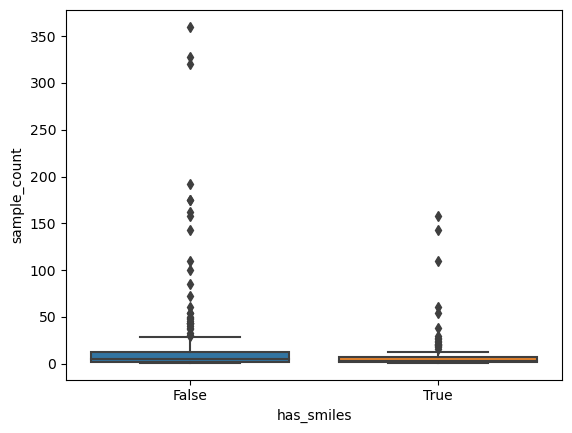

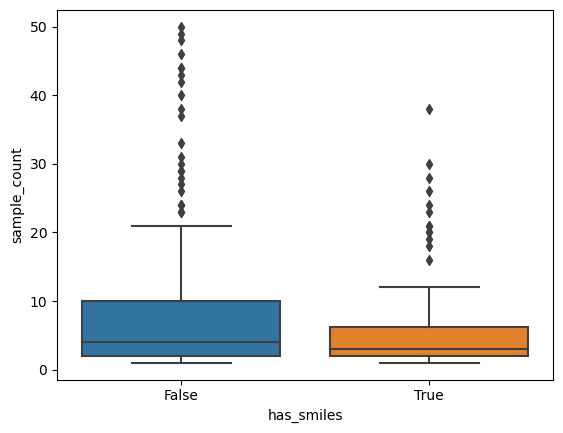

,sample_count
count,149.000000
mean,8.832215
std,20.613038
min,1.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,158.000000


,sample_count
count,221.000000
mean,19.479638
std,48.106849
min,1.000000
25%,2.000000
50%,5.000000
75%,13.000000
max,360.000000


In [12]:
tmp = (
    df_go_chebi_primary.merge(
        df_uniprot_goa[["Uniprot", "go_id_ancestor"]]
        .groupby("go_id_ancestor")
        .apply(lambda x: len(x.Uniprot))
        .rename("sample_count")
        .reset_index(),
        how="left",
        left_on="go_id",
        right_on="go_id_ancestor",
    )
    .assign(
        has_smiles=df_go_chebi_primary.chebi_id_ancestor.isin(
            df_molecular_properties[
                df_molecular_properties.property == "smiles"
            ].chebi_id
        )
    )[["go_id", "sample_count", "has_smiles"]]
    .drop_duplicates()
)

import seaborn as sns
import matplotlib.pyplot as plt
# sns.violinplot(tmp, x="has_smiles", y="sample_count")
sns.boxplot(tmp, x="has_smiles", y="sample_count")
plt.show()

sns.boxplot(tmp[tmp.sample_count <=50], x="has_smiles", y="sample_count")
plt.show()
display(tmp[tmp.has_smiles].describe())
display(tmp[~tmp.has_smiles].describe())

Which GO terms have SMILES and enough samples available?

In [13]:
tmp = tmp[tmp.has_smiles & (tmp.sample_count >=20)].merge(df_uniprot_goa[["go_id_ancestor", "go_term_ancestor"]], how="left", left_on="go_id", right_on="go_id_ancestor").drop_duplicates().reset_index(drop=True)
tmp

,go_id,sample_count,has_smiles,go_id_ancestor,go_term_ancestor
0,GO:0005310,20,True,GO:0005310,dicarboxylic acid transmembrane transporter ac...
1,GO:0005351,23,True,GO:0005351,carbohydrate:proton symporter activity
2,GO:0005385,20,True,GO:0005385,zinc ion transmembrane transporter activity
3,GO:0008028,24,True,GO:0008028,monocarboxylic acid transmembrane transporter ...
4,GO:0009678,54,True,GO:0009678,pyrophosphate hydrolysis-driven proton transme...
5,GO:0015078,143,True,GO:0015078,proton transmembrane transporter activity
6,GO:0015079,28,True,GO:0015079,potassium ion transmembrane transporter activity
7,GO:0015081,21,True,GO:0015081,sodium ion transmembrane transporter activity
8,GO:0015085,30,True,GO:0015085,calcium ion transmembrane transporter activity
9,GO:0015171,110,True,GO:0015171,amino acid transmembrane transporter activity


How many transporters do these GO terms cover?

In [14]:
df_uniprot_goa[df_uniprot_goa.go_id_ancestor.isin(tmp.go_id)].Uniprot.unique()

<StringArray>
['P00163', 'P00401', 'P00410', 'P00420', 'P00830', 'P00854', 'P00856',
 'P03877', 'P03878', 'P04817',
 ...
 'Q12372', 'Q12375', 'Q12407', 'Q12436', 'Q12691', 'Q3E7B6', 'Q99271',
 'Q99297', 'Q99385', 'Q9ZZX1']
Length: 173, dtype: string

What are some examples of proteins and go terms that are no longer annotated?

In [15]:
df_uniprot_goa[~df_uniprot_goa.go_id_ancestor.isin(tmp.go_id)].go_term_ancestor.value_counts()

go_term_ancestor
transmembrane transporter activity                                                   1103
inorganic molecular entity transmembrane transporter activity                         385
monoatomic ion transmembrane transporter activity                                     360
monoatomic cation transmembrane transporter activity                                  328
active transmembrane transporter activity                                             324
                                                                                     ... 
maltose:proton symporter activity                                                       1
trehalose transmembrane transporter activity                                            1
biotin transmembrane transporter activity                                               1
proton-dependent oligopeptide secondary active transmembrane transporter activity       1
UDP-glucose transmembrane transporter activity                                     

In [16]:
tmp_proteins_no_chebi_terms = df_sequences.loc[
    df_uniprot_goa[~df_uniprot_goa.go_id_ancestor.isin(tmp.go_id)].Uniprot.unique()
].protein_names

Is there some other way of filtering?

In [17]:
df_sequences.assign(
    has_chebi=df_sequences.index.isin(
        df_uniprot_goa.merge(
            df_go_chebi, how="inner", left_on="go_id_ancestor", right_on="go_id"
        ).Uniprot
    ),
    
)

,sequence,reviewed,protein_existence,organism_id,protein_names,has_chebi
Uniprot,,,,,,
P00401,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...,True,1,559292,Cytochrome c oxidase subunit 1 (EC 7.1.1.9) (C...,True
P00830,MVLPRLYTATSRAAFKAAKQSAPLLSTSWKRCMASAAQSTPITGKV...,True,1,559292,"ATP synthase subunit beta, mitochondrial (EC 7...",True
P04817,MTNSKEDADIEEKHMYNEPVTTLFHDVEASQTHHRRGSIPLKDEKS...,True,1,559292,Arginine permease CAN1 (Canavanine resistance ...,True
P07213,MKSFITRNKTAILATVAATGTAIGAYYYYNQLQQQQQRGKKNTINK...,True,1,559292,Mitochondrial import receptor subunit TOM70 (7...,True
P14906,MPTNYEYDEASETWPSFILTGLLMVVGPMTLLQIYQIFFGANAEDG...,True,1,559292,Protein translocation protein SEC63 (Protein N...,True
...,...,...,...,...,...,...
P39542,MFQQLSASIRHNAHIIFLCISWYFISSLASQVTKQVLTVCPLPLFL...,True,1,559292,Uncharacterized transporter YJL193W,True
Q05497,MAGILSKTLSEVHPSLRTNGMGIGNTHRRISLGFLPPNKKNPLVRK...,True,1,559292,Uncharacterized transporter YDR338C,False
P38318,MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...,True,1,559292,Uncharacterized membrane protein YBR220C,True


## Adjacency matrix

In [18]:
from subpred.adjacency_matrices import (
    get_chebi_adjacency_matrix,
    get_go_adjacency_matrix,
)

### GO adjacency

In [19]:
df_adj_matrix_go = get_go_adjacency_matrix(
    df_uniprot_goa=df_uniprot_goa, edges_filter={"is_a"}
)
df_adj_matrix_go

,GO:0000006,GO:0000007,GO:0000064,GO:0000095,GO:0000099,GO:0000100,GO:0000102,GO:0000295,GO:0000297,GO:0000319,...,GO:1901474,GO:1901505,GO:1901618,GO:1901680,GO:1901682,GO:1901702,GO:1902557,GO:1903089,GO:1903425,GO:1904680
GO:0000006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
GO:0000099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:1901702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:1902557,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
GO:1903089,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
GO:1903425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### ChEBI adjacency

In [20]:
df_adj_matrix_chebi = get_chebi_adjacency_matrix(
    df_go_chebi=df_go_chebi,
    edges_filter={"is_a"},
    primary_substrate_only=True,
)
df_adj_matrix_chebi

,CHEBI:13389,CHEBI:15354,CHEBI:15361,CHEBI:15377,CHEBI:15595,CHEBI:15676,CHEBI:15792,CHEBI:15927,CHEBI:16189,CHEBI:16199,...,CHEBI:61109,CHEBI:61292,CHEBI:61293,CHEBI:61336,CHEBI:63063,CHEBI:63299,CHEBI:64709,CHEBI:68452,CHEBI:77847,CHEBI:83821
CHEBI:13389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:63299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:64709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:68452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:77847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Chemical similarity

Here, we are using the morgan fingerprints. There are other options that might be better:


In [21]:
from subpred.chemical_similarity import get_pairwise_similarity, tanimoto_chebi_to_go

dict_tanimoto_matrices_chebi = {
    f"tanimoto_{method}": get_pairwise_similarity(
        df_go_chebi=df_go_chebi, fingerprint_method=method
    )
    for method in ["morgan", "atompairs", "torsions", "maccs"]
}

[13:00:03] WARNING: not removing hydrogen atom without neighbors
[13:00:07] WARNING: not removing hydrogen atom without neighbors
[13:00:11] WARNING: not removing hydrogen atom without neighbors
[13:00:16] WARNING: not removing hydrogen atom without neighbors


In [22]:
dict_tanimoto_matrices_go = {
    f"{matrix_name}_go_{agg_method}": tanimoto_chebi_to_go(
        df_tanimoto_chebi=df_tanimoto_chebi,
        df_go_chebi=df_go_chebi,
        agg_function=agg_method,
        primary_input_only=True,
    )
    for matrix_name, df_tanimoto_chebi in dict_tanimoto_matrices_chebi.items()
    for agg_method in ["mean", "median", "min", "max"]
}
dict_tanimoto_matrices_go

{'tanimoto_morgan_go_mean': go_id2      GO:0000064  GO:0000095  GO:0000100  GO:0000102  GO:0000297  \
 go_id1                                                                   
 GO:0000064    1.000000    0.218750    0.500000    0.500000    0.222222   
 GO:0000095    0.218750    1.000000    0.311475    0.230769    0.028986   
 GO:0000100    0.500000    0.311475    1.000000    0.517241    0.060606   
 GO:0000102    0.500000    0.230769    0.517241    1.000000    0.060606   
 GO:0000297    0.222222    0.028986    0.060606    0.060606    1.000000   
 ...                ...         ...         ...         ...         ...   
 GO:1901235    0.212121    0.130435    0.235294    0.235294    0.031250   
 GO:1901239    0.250000    0.096774    0.230769    0.230769    0.045455   
 GO:1902557    0.057143    0.493333    0.055556    0.055556    0.015152   
 GO:1903089    0.074074    0.352113    0.071429    0.071429    0.020000   
 GO:1903425    0.000000    0.000000    0.000000    0.000000    0.000000  

## Overlap Matrix

### GO

In [23]:
from subpred.overlap_matrix import get_go_overlap_matrix, plot_go_overlap_matrix

df_go_overlaps = get_go_overlap_matrix(
    df_uniprot_goa=df_uniprot_goa, exclude_iea=EXCLUDE_IEA_GO_TERMS
)
df_go_overlaps

go_id2,GO:0000006,GO:0000007,GO:0000064,GO:0000095,GO:0000099,GO:0000100,GO:0000102,GO:0000295,GO:0000297,GO:0000319,...,GO:1901474,GO:1901505,GO:1901618,GO:1901680,GO:1901682,GO:1901702,GO:1902557,GO:1903089,GO:1903425,GO:1904680
go_id1,,,,,,,,,,,,,,,,,,,,,
GO:0000006,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
GO:0000007,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
GO:0000064,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000095,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
GO:0000099,0,0,0,0,3,0,1,0,0,0,...,0,0,0,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:1901702,1,1,0,0,0,0,0,8,0,1,...,3,8,3,0,9,72,0,0,2,0
GO:1902557,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
GO:1903089,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,1,0,0,2,0,0


In [24]:
# plot_go_overlap_matrix(df_go_overlaps=df_go_overlaps, df_uniprot_goa=df_uniprot_goa)

### ChEBI

In [25]:
from subpred.overlap_matrix import get_chebi_overlaps

df_chebi_overlaps = get_chebi_overlaps(
    df_go_chebi=df_go_chebi,
    df_uniprot_goa=df_uniprot_goa,
    exclude_iea=EXCLUDE_IEA_GO_TERMS,
    primary_input_only=True,
)
df_chebi_overlaps

,CHEBI:13389,CHEBI:15354,CHEBI:15361,CHEBI:15377,CHEBI:15595,CHEBI:15676,CHEBI:15792,CHEBI:15927,CHEBI:16189,CHEBI:16199,...,CHEBI:61109,CHEBI:61292,CHEBI:61293,CHEBI:61336,CHEBI:63063,CHEBI:63299,CHEBI:64709,CHEBI:68452,CHEBI:77847,CHEBI:83821
CHEBI:13389,2,0,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,0,0
CHEBI:15354,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEBI:15361,1,0,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,4,0,0,0
CHEBI:15377,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15595,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:63299,0,0,0,0,0,0,0,2,0,0,...,2,0,10,2,0,25,3,2,1,0
CHEBI:64709,1,0,4,0,1,0,1,0,2,0,...,0,0,3,6,2,3,65,3,0,5
CHEBI:68452,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,2,3,8,0,2
CHEBI:77847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## GO Semantic Similarity Matrix


In [26]:
from subpred.go_semantic_similarity import get_semantic_similarities

semsim_measures = ["Resnik", "Lin", "Rel", "Jiang", "TCSS", "Wang"]

dict_semsim_matrices = {
    semsim_measure: get_semantic_similarities(
        go_terms=df_uniprot_goa.go_id_ancestor.unique().tolist(),
        measure=semsim_measure,  # {"Resnik", "Lin", "Rel", "Jiang", "TCSS", "Wang"}
        organism="yeast",
        ont="MF",
        tcss_cutoff=3,
    )
    for semsim_measure in semsim_measures
}

# for semsim_measure in semsim_measures:
#     df_semantic_similarity = get_semantic_similarities(
#         go_terms=df_uniprot_goa.go_id_ancestor.unique().tolist(),
#         measure=semsim_measures,  # {"Resnik", "Lin", "Rel", "Jiang", "TCSS", "Wang"}
#         organism="yeast",
#         ont="MF",
#         tcss_cutoff=3
#     )
# TODO method that calculates tcss cutoff for given organism automatically
# https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-11-562#Sec13
# 3.2 from original paper, but was calculated on 2010 dataset
# df_semantic_similarity

R[write to console]: Error in (function ()  : 
  org.Sc.sgdPFAM is defunct. Please use select() if you need access to
  PFAM or PROSITE accessions.

/home/andy/mambaforge/envs/subpred4/lib/python3.10/site-packages/rpy2/robjects/packages.py:263: UserWarning: R C-API Rf_findVarInFrame()
  warn(str(rre))
R[write to console]: preparing gene to GO mapping data...

R[write to console]: preparing IC data...

R[write to console]: preparing TCSS data...

R[write to console]: Error in (function ()  : 
  org.Sc.sgdPFAM is defunct. Please use select() if you need access to
  PFAM or PROSITE accessions.

/home/andy/mambaforge/envs/subpred4/lib/python3.10/site-packages/rpy2/robjects/packages.py:263: UserWarning: R C-API Rf_findVarInFrame()
  warn(str(rre))
R[write to console]: preparing gene to GO mapping data...

R[write to console]: preparing IC data...

R[write to console]: preparing TCSS data...

R[write to console]: Error in (function ()  : 
  org.Sc.sgdPFAM is defunct. Please use select() if y

## Stats on dataset

### Before clustering

In [27]:
from subpred.go_prediction import get_label_to_proteins
from subpred.cdhit import cd_hit

Relationship between number of GO terms and min_samples:

<Axes: xlabel='Minimum number of samples', ylabel='Number of GO terms'>

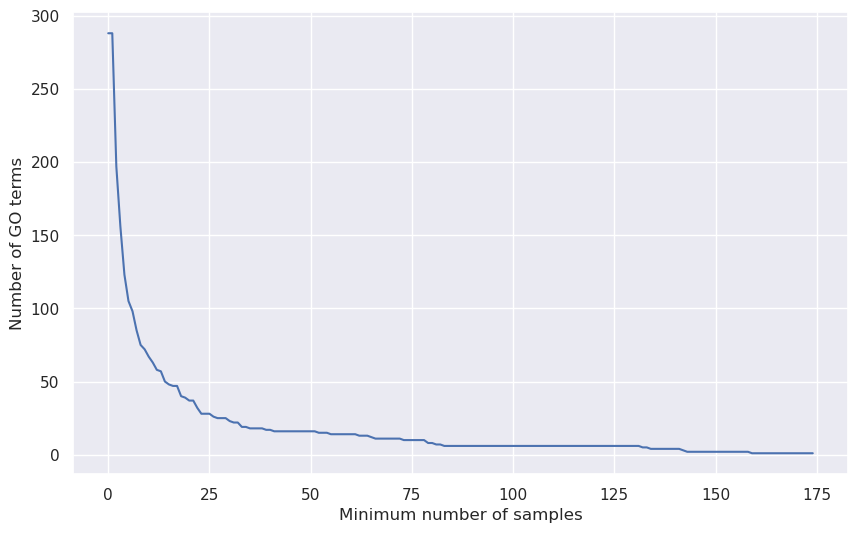

In [28]:
sns.set(rc={"figure.figsize": (10, 6)})

labels_to_proteins_all = get_label_to_proteins(
    df_uniprot_goa,
    min_samples_per_class=0,
    exclude_iea=EXCLUDE_IEA_GO_TERMS,
)
tmp = pd.DataFrame(list(range(175)), columns=["min_samples"])
tmp = tmp.assign(
    num_go_terms=tmp.min_samples.apply(
        lambda x: len({k:v for k,v in labels_to_proteins_all.items() if len(v) >= x}.keys())
    )
)
tmp = tmp.rename(columns={"num_go_terms": "Number of GO terms", "min_samples": "Minimum number of samples"})
sns.lineplot(tmp, x="Minimum number of samples", y="Number of GO terms")

How many for at least 20 samples?

In [29]:
min_unique_samples_per_class = 20
label_to_proteins = get_label_to_proteins(
    df_uniprot_goa, min_samples_per_class=20, exclude_iea=EXCLUDE_IEA_GO_TERMS
)
print(
    "Number of GO terms with more than 20 samples:", len(set(label_to_proteins.keys()))
)

Number of GO terms with more than 20 samples: 37


Stats on pairs:

In [30]:
records = []
for go_term1, set_proteins1 in label_to_proteins.items():
    for go_term2, set_proteins2 in label_to_proteins.items():
        intersection_set = set_proteins1 & set_proteins2
        unique_proteins1 = set_proteins1 - intersection_set
        unique_proteins2 = set_proteins2 - intersection_set
        enough_unique_samples = (
            len(unique_proteins1) >= min_unique_samples_per_class
            and len(unique_proteins2) >= min_unique_samples_per_class
        )
        records.append([go_term1, go_term2, enough_unique_samples])

df_unique_samples_analysis = pd.DataFrame.from_records(
    records, columns=["go1", "go2", "enough_unique_samples"]
)


go_terms_count = len(set(label_to_proteins.keys()))
print("total number of distince pairs:", go_terms_count**2 - go_terms_count)
print(
    "distinct pairs with enough unique samples in each class",
    df_unique_samples_analysis[
        (df_unique_samples_analysis.go1 != df_unique_samples_analysis.go2)
        & ~df_unique_samples_analysis.enough_unique_samples
    ].shape[0],
)

total number of distince pairs: 1332
distinct pairs with enough unique samples in each class 524


How does sequence clustering impact the stats? 

In [31]:
representatives = cd_hit(
    sequences=df_sequences.sequence,
    identity_threshold=70,
)
df_sequences_clustered = df_sequences.loc[representatives]
df_uniprot_goa_clustered = df_uniprot_goa[df_uniprot_goa.Uniprot.isin(representatives)]
label_to_proteins_clustered = get_label_to_proteins(
    df_uniprot_goa_clustered, min_samples_per_class=20, exclude_iea=EXCLUDE_IEA_GO_TERMS
)
print(
    "Number of GO terms with more than 20 samples:", len(set(label_to_proteins_clustered.keys()))
)

cd-hit: clustered 332 sequences into 303 clusters at threshold 70
Number of GO terms with more than 20 samples: 32


## Pairwise ML models

- find label combinations with enough samples

### Testing

Questions:

- Does feature selection improve the scores, and which method to use?
    - Boxplot, mean, median, min, max
    - What are the best parameters for the feature selection methods?
        - Ability to change parameters from the outside?
        - Try no parameters 
- How are these scores impacted by sequence clustering?
- What is the impact of min. number of samples?
    - Number of available GO terms
    - Score vs. min. number of samples

Test parameters:

- at least 20 unique samples per class
- with and without 70%sequence clustering 
- comparing feature selection methods

In [32]:
from subpred.go_prediction import (
    get_model_evaluation_matrix_parallel,
    process_pairwise_eval_results,
)
import pickle

RETRAIN = False

if RETRAIN:
    # 100% is the same as no clustering for the yeast dataset
    test_cases = [  # Multi-parameter models
        ["nofs_cl0", "svc_multi", None, None],
        ["pbest10_cl0", "pbest_svc_multi", None, [10]],  # 160
        ["pbest20_cl0", "pbest_svc_multi", None, [20]],  # 320
        ["pbest50_cl0", "pbest_svc_multi", None, [50]],  # 800
        ["pbestALL_cl0", "pbest_svc_multi", None, [10, 20, 50]],
        ["kbest10_cl0", "kbest_svc_multi", None, [10]],
        ["kbest40_cl0", "kbest_svc_multi", None, [40]],
        ["kbest80_cl0", "kbest_svc_multi", None, [80]],
        ["pca10_cl0", "pca_svc_multi", None, [10]],
        ["pca20_cl0", "pca_svc_multi", None, [20]],
        ["pcaNone_cl0", "pca_svc_multi", None, [None]],
        ["pcaALL_cl0", "pca_svc_multi", None, [10, 20, None]],
        ["nofs_cl70", "svc_multi", 70, None],
        ["pbest10_cl70", "pbest_svc_multi", 70, [10]],  # 160
        ["pbest20_cl70", "pbest_svc_multi", 70, [20]],  # 320
        ["pbest50_cl70", "pbest_svc_multi", 70, [50]],  # 800
        ["pbestALL_cl70", "pbest_svc_multi", 70, [10, 20, 50]],
        ["kbest10_cl70", "kbest_svc_multi", 70, [10]],
        ["kbest40_cl70", "kbest_svc_multi", 70, [40]],
        ["kbest80_cl70", "kbest_svc_multi", 70, [80]],
        ["pca10_cl70", "pca_svc_multi", 70, [10]],
        ["pca20_cl70", "pca_svc_multi", 70, [20]],
        ["pcaNone_cl70", "pca_svc_multi", 70, [None]],
        ["pcaALL_cl70", "pca_svc_multi", 70, [10, 20, None]],
    ]

    ml_models_results = dict()

    for (
        test_name,
        model_name,
        seq_clustering_threshold,
        feature_selection_parameters,
    ) in test_cases:
        print("'" * 60)
        print(test_name)

        if seq_clustering_threshold:
            representatives = cd_hit(
                sequences=df_sequences.sequence,
                identity_threshold=seq_clustering_threshold,
            )
            df_sequences_clustered = df_sequences.loc[representatives]
            df_uniprot_goa_clustered = df_uniprot_goa[
                df_uniprot_goa.Uniprot.isin(representatives)
            ]
        else:
            df_sequences_clustered = df_sequences
            df_uniprot_goa_clustered = df_uniprot_goa

        pairwise_eval_results = get_model_evaluation_matrix_parallel(
            df_sequences_clustered,
            df_uniprot_goa_clustered,
            exclude_iea=EXCLUDE_IEA_GO_TERMS,
            standardize_samples=True,
            multi_output=True,
            min_samples_per_class=20,
            min_unique_samples_per_class=20,
            model_name=model_name,  # kbest_svc_multi, pca_svc_multi
            feature_selection_parameters=feature_selection_parameters,
            n_jobs=-1,
        )

        df_train_results, df_test_results = process_pairwise_eval_results(
            pairwise_eval_results=pairwise_eval_results,
            df_uniprot_goa=df_uniprot_goa_clustered,
            convert_go_ids_to_terms=False,
        )
        ml_models_results[test_name] = [df_train_results, df_test_results]

    with open("ml_models_results.pickle", "wb") as handle:
        pickle.dump(ml_models_results, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open("ml_models_results.pickle", "rb") as handle:
        ml_models_results = pickle.load(handle)

#### Analysis and comparison between ML results

Create long df for seaborn:

In [33]:
df_plot_ml = pd.DataFrame(
    columns=["dataset", "feature_selection", "clustering", "f1_score"]
)
for results_name, dfs in sorted(ml_models_results.items()):
    feature_selection_method, clustering_threshold = results_name.split("_cl")
    clustering_threshold = int(clustering_threshold)
    df_results_train, df_results_test = dfs
    f1_train = df_results_train.values.ravel()
    f1_test = df_results_test.values.ravel()
    df_plot_ml_train = pd.DataFrame(
        [
            ["train"] * len(f1_train),
            [feature_selection_method] * len(f1_train),
            [clustering_threshold] * len(f1_train),
            f1_train,
        ],
        index=df_plot_ml.columns,
    ).transpose()
    df_plot_ml_test = pd.DataFrame(
        [
            ["test"] * len(f1_test),
            [feature_selection_method] * len(f1_test),
            [clustering_threshold] * len(f1_test),
            f1_test,
        ],
        index=df_plot_ml.columns,
    ).transpose()
    df_plot_ml = pd.concat([df_plot_ml, df_plot_ml_train, df_plot_ml_test]).reset_index(
        drop=True
    )



Plot with all models:

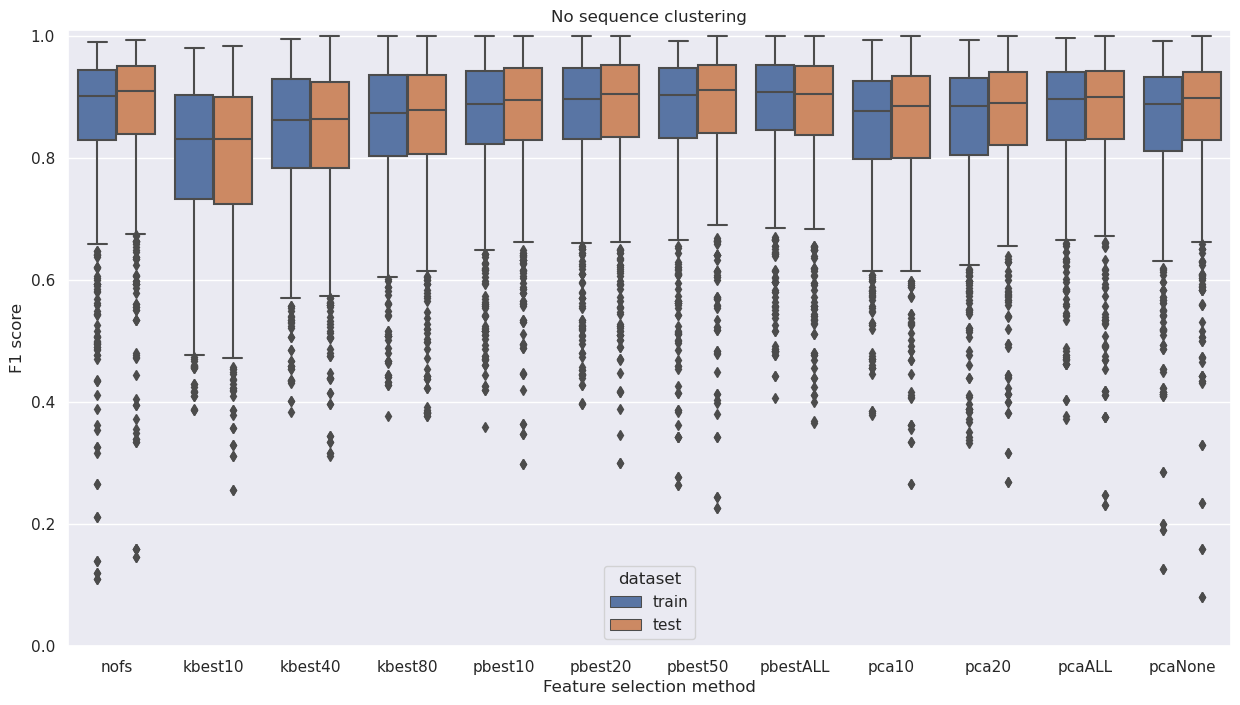

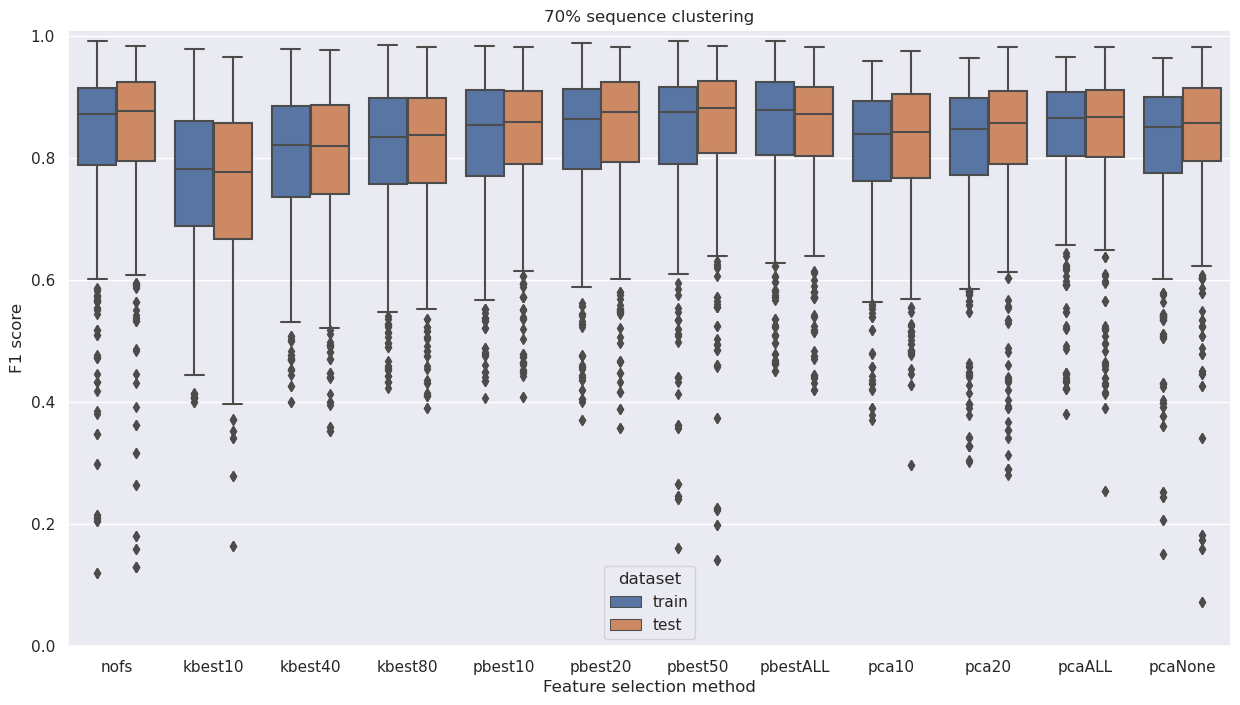

min      mean    median  \
clustering dataset Feature selection method                                 
0          test    kbest10                   0.256699  0.798868  0.831351   
                   kbest40                   0.312255  0.834757  0.864487   
                   kbest80                    0.37671  0.849699      0.88   
                   nofs                      0.146667  0.872025  0.911108   
                   pbest10                   0.298942  0.867873  0.895133   
                   pbest20                   0.300121  0.874929  0.904774   
                   pbest50                   0.226667   0.87865  0.912831   
                   pbestALL                  0.365701  0.875452   0.90475   
                   pca10                     0.266117  0.851514  0.885065   
                   pca20                     0.269565  0.862553  0.891348   
                   pcaALL                    0.230952   0.86891  0.899857   
                   pcaNone                       0.08   0.86532  0.899005   
           train   kbest10                   0.387969  0.806738  0.831715   
                   kbest40                   0.383972  0.838313   0.86243   
                   kbest80                   0.377584  0.850551  0.874484   
                   nofs                          0.11  0.858102  0.901966   
                   pbest10                   0.359311  0.860928  0.889233   
                   pbest20                   0.397634   0.86647  0.897229   
                   pbest50                   0.265094  0.865901   0.90304   
                   pbestALL                  0.406515   0.87988  0.907944   
                   pca10                      0.37944  0.847182  0.877295   
                   pca20                     0.332711  0.849574  0.885004   
                   pcaALL                    0.373318   0.87022  0.897756   
                   pcaNone                   0.126667  0.848734   0.88892   
70         test    kbest10                    0.16381  0.753149  0.776942   
                   kbest40                    0.35368  0.794998  0.820806   
                   kbest80                    0.39009  0.813166  0.838022   
                   nofs                          0.13  0.837649  0.877778   
                   pbest10                    0.40915  0.831137  0.860381   
                   pbest20                   0.357648  0.844332  0.875826   
                   pbest50                   0.141538  0.845765  0.881911   
                   pbestALL                  0.420202  0.843144  0.873142   
                   pca10                     0.297902  0.820497  0.842879   
                   pca20                     0.280952   0.82969  0.858654   
                   pcaALL                    0.255045  0.839657  0.868048   
                   pcaNone                   0.072727  0.827971  0.857182   
           train   kbest10                   0.400104  0.764277   0.78243   
                   kbest40                   0.400125  0.797844  0.822095   
                   kbest80                   0.423803   0.81302  0.834592   
                   nofs                          0.12  0.827588  0.872673   
                   pbest10                   0.406428  0.827026  0.854558   
                   pbest20                   0.371567  0.832797   0.86456   
                   pbest50                   0.160844  0.834333  0.875757   
                   pbestALL                  0.452032  0.849836  0.878731   
                   pca10                     0.371279  0.812115   0.83991   
                   pca20                     0.301548  0.814715  0.848303   
                   pcaALL                    0.380491  0.838052  0.865444   
                   pcaNone                   0.151111  0.812879  0.850587   

                                                  max      sdev  
clustering dataset Feature selection method                      
0          test    kbest10                   0.984615  0.135516  
 

In [34]:
df_plot_ml = df_plot_ml.rename(
    columns={"f1_score": "F1 score", "feature_selection": "Feature selection method"}
)

fs_order = df_plot_ml["Feature selection method"]
fs_order = ["nofs"] + sorted(fs_order[fs_order != "nofs"].unique().tolist())

sns.set(rc={"figure.figsize": (15, 8)})

# Plots of all models
ax = sns.boxplot(
    df_plot_ml[df_plot_ml.clustering == 0],
    x="Feature selection method",
    y="F1 score",
    hue="dataset",
    order=fs_order,
)
ax.set_ylim(0, 1.01)
ax.set_title("No sequence clustering")
plt.show()

ax = sns.boxplot(
    df_plot_ml[df_plot_ml.clustering == 70],
    x="Feature selection method",
    y="F1 score",
    hue="dataset",
    order=fs_order,
)
ax.set_ylim(0, 1.01)
ax.set_title("70% sequence clustering")
plt.show()

display(
    pd.concat(
        [
            df_plot_ml.groupby(["clustering", "dataset", "Feature selection method"])
            .min()
            .rename(columns={"F1 score": "min"}),
            df_plot_ml.groupby(["clustering", "dataset", "Feature selection method"])
            .mean()
            .rename(columns={"F1 score": "mean"}),
            df_plot_ml.groupby(["clustering", "dataset", "Feature selection method"])
            .median()
            .rename(columns={"F1 score": "median"}),
            df_plot_ml.groupby(["clustering", "dataset", "Feature selection method"])
            .max()
            .rename(columns={"F1 score": "max"}),
            df_plot_ml.groupby(["clustering", "dataset", "Feature selection method"])
            .std()
            .rename(columns={"F1 score": "sdev"}),
        ],
        axis=1,
    )
)

Plots for paper:

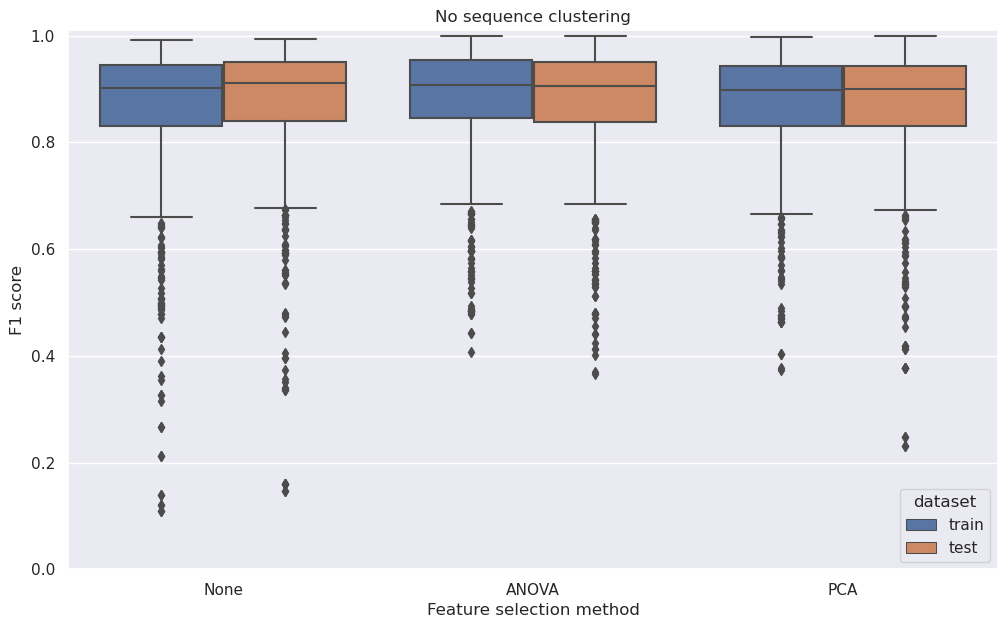

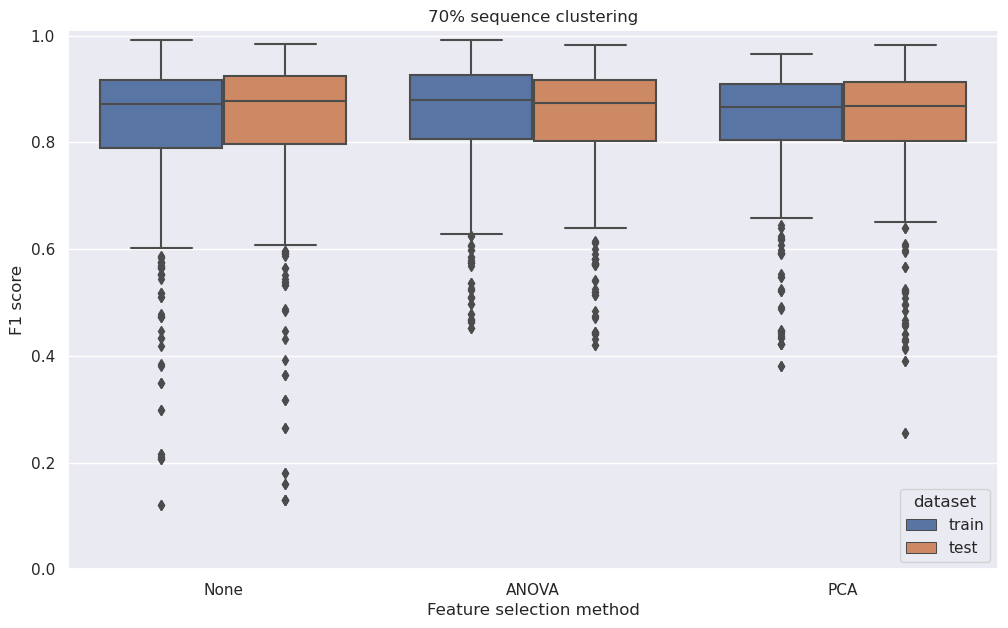

min      mean    median  \
clustering dataset Feature selection method                                 
0          test    ANOVA                     0.365701  0.875452   0.90475   
                   None                      0.146667  0.872025  0.911108   
                   PCA                       0.230952   0.86891  0.899857   
           train   ANOVA                     0.406515   0.87988  0.907944   
                   None                          0.11  0.858102  0.901966   
                   PCA                       0.373318   0.87022  0.897756   
70         test    ANOVA                     0.420202  0.843144  0.873142   
                   None                          0.13  0.837649  0.877778   
                   PCA                       0.255045  0.839657  0.868048   
           train   ANOVA                     0.452032  0.849836  0.878731   
                   None                          0.12  0.827588  0.872673   
                   PCA                       0.380491  0.838052  0.865444   

                                                  max      sdev  
clustering dataset Feature selection method                      
0          test    ANOVA                          1.0  0.111613  
                   None                      0.993939  0.127663  
                   PCA                            1.0  0.115716  
           train   ANOVA                          1.0  0.106542  
                   None                      0.990909  0.139763  
                   PCA                       0.997059  0.103799  
70         test    ANOVA                     0.982609  0.110068  
                   None                      0.984615  0.141148  
                   PCA                       0.981781  0.114324  
           train   ANOVA                     0.992308  0.109766  
                   None                      0.992308  0.142523  
                   PCA                       0.966328  0.108803

In [35]:
sns.set(rc={"figure.figsize": (12.0, 7.0)})

# Plots of only three models for paper
df_plot_ml_best_models = df_plot_ml[
    df_plot_ml["Feature selection method"].isin({"nofs", "pcaALL", "pbestALL"})
]
df_plot_ml_best_models.loc[:,"Feature selection method"] = df_plot_ml_best_models[
    "Feature selection method"
].map({"nofs": "None", "pcaALL": "PCA", "pbestALL": "ANOVA"})

ax = sns.boxplot(
    df_plot_ml_best_models[df_plot_ml_best_models.clustering == 0],
    x="Feature selection method",
    y="F1 score",
    hue="dataset",
    order=["None", "ANOVA", "PCA"],
)
ax.set_ylim(0, 1.01)
ax.set_title("No sequence clustering")
plt.show()

ax = sns.boxplot(
    df_plot_ml_best_models[df_plot_ml_best_models.clustering == 70],
    x="Feature selection method",
    y="F1 score",
    hue="dataset",
    order=["None", "ANOVA", "PCA"],
)
ax.set_ylim(0, 1.01)
ax.set_title("70% sequence clustering")
plt.show()

df_plot_ml_best_models_stats = pd.concat(
    [
        df_plot_ml_best_models.groupby(["clustering", "dataset", "Feature selection method"])
        .min()
        .rename(columns={"F1 score": "min"}),
        df_plot_ml_best_models.groupby(["clustering", "dataset", "Feature selection method"])
        .mean()
        .rename(columns={"F1 score": "mean"}),
        df_plot_ml_best_models.groupby(["clustering", "dataset", "Feature selection method"])
        .median()
        .rename(columns={"F1 score": "median"}),
        df_plot_ml_best_models.groupby(["clustering", "dataset", "Feature selection method"])
        .max()
        .rename(columns={"F1 score": "max"}),
        df_plot_ml_best_models.groupby(["clustering", "dataset", "Feature selection method"])
        .std()
        .rename(columns={"F1 score": "sdev"}),
    ],
    axis=1,
)
display(df_plot_ml_best_models_stats)

In [36]:
df_plot_ml_best_models_stats = df_plot_ml_best_models_stats.reindex(["None", "ANOVA", "PCA"], level=2).reindex(["train", "test"], level=1).rename(index={0:"None"})
df_plot_ml_best_models_stats.index = df_plot_ml_best_models_stats.index.rename(["Clustering", "Dataset", "Method"])
display(df_plot_ml_best_models_stats) 
print(df_plot_ml_best_models_stats.to_latex(float_format="%.2f"))

min      mean    median       max      sdev
Clustering Dataset Method                                                  
None       train   None        0.11  0.858102  0.901966  0.990909  0.139763
                   ANOVA   0.406515   0.87988  0.907944       1.0  0.106542
                   PCA     0.373318   0.87022  0.897756  0.997059  0.103799
           test    None    0.146667  0.872025  0.911108  0.993939  0.127663
                   ANOVA   0.365701  0.875452   0.90475       1.0  0.111613
                   PCA     0.230952   0.86891  0.899857       1.0  0.115716
70         train   None        0.12  0.827588  0.872673  0.992308  0.142523
                   ANOVA   0.452032  0.849836  0.878731  0.992308  0.109766
                   PCA     0.380491  0.838052  0.865444  0.966328  0.108803
           test    None        0.13  0.837649  0.877778  0.984615  0.141148
                   ANOVA   0.420202  0.843144  0.873142  0.982609  0.110068
                   PCA     0.255045  0.839657  0.868048  0.981781  0.114324

\begin{tabular}{lllllllr}
\toprule
 &  &  & min & mean & median & max & sdev \\
Clustering & Dataset & Method &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{None} & \multirow[t]{3}{*}{train} & None & 0.11 & 0.86 & 0.90 & 0.99 & 0.14 \\
 &  & ANOVA & 0.41 & 0.88 & 0.91 & 1.00 & 0.11 \\
 &  & PCA & 0.37 & 0.87 & 0.90 & 1.00 & 0.10 \\
\cline{2-8}
 & \multirow[t]{3}{*}{test} & None & 0.15 & 0.87 & 0.91 & 0.99 & 0.13 \\
 &  & ANOVA & 0.37 & 0.88 & 0.90 & 1.00 & 0.11 \\
 &  & PCA & 0.23 & 0.87 & 0.90 & 1.00 & 0.12 \\
\cline{1-8} \cline{2-8}
\multirow[t]{6}{*}{70} & \multirow[t]{3}{*}{train} & None & 0.12 & 0.83 & 0.87 & 0.99 & 0.14 \\
 &  & ANOVA & 0.45 & 0.85 & 0.88 & 0.99 & 0.11 \\
 &  & PCA & 0.38 & 0.84 & 0.87 & 0.97 & 0.11 \\
\cline{2-8}
 & \multirow[t]{3}{*}{test} & None & 0.13 & 0.84 & 0.88 & 0.98 & 0.14 \\
 &  & ANOVA & 0.42 & 0.84 & 0.87 & 0.98 & 0.11 \\
 &  & PCA & 0.26 & 0.84 & 0.87 & 0.98 & 0.11 \\
\cline{1-8} \cline{2-8}
\bottomrule
\end{tabular}



PBest and KBest perform very similar, which makes sense since they do the same thing but with different thresholds.

### Which properties do the worst-performing pairs have?

TODO

#### Selecting the best

In [38]:
df_train_results, df_test_results = ml_models_results["pbestALL_cl0"]

## Pairwise sequence sim matrix

In [39]:
from subpred.sequence_identity import (
    get_pairwise_alignment_scores,
    get_aggregated_sequence_alignments_go,
)

df_protein_identity, df_protein_alignment_scores = get_pairwise_alignment_scores(
    df_sequences=df_sequences,
    df_uniprot_goa=df_uniprot_goa,
    exclude_iea=EXCLUDE_IEA_GO_TERMS,
)

In [40]:
dict_pairwise_alignment_scores = dict()
# TODO why does this take so long?
for score_name, score_matrix in zip(
    ["identity", "alignment_score"],
    [df_protein_identity, df_protein_alignment_scores],
):
    for aggr_method in [
        "median",
        "mean",
        "max",
        "min",
    ]:
        dict_pairwise_alignment_scores[
            f"go_{aggr_method}_sequence_{score_name}"
        ] = get_aggregated_sequence_alignments_go(
            df_uniprot_goa=df_uniprot_goa,
            df_protein_scores=score_matrix,
            exclude_iea=EXCLUDE_IEA_GO_TERMS,
            aggr_method=aggr_method,
        )

In [41]:
dict_pairwise_alignment_scores

{'go_median_sequence_identity': go_id2      GO:0000006  GO:0000007  GO:0000064  GO:0000095  GO:0000099  \
 go_id1                                                                   
 GO:0000006  100.000000   35.267857   15.094340   16.698890   15.679443   
 GO:0000007   35.267857  100.000000   15.165877   13.832989   14.259598   
 GO:0000064   15.094340   15.165877   64.133739   17.578321   14.312618   
 GO:0000095   16.698890   13.832989   17.578321   55.792164   15.178456   
 GO:0000099   15.679443   14.259598   14.312618   15.178456   25.557461   
 ...                ...         ...         ...         ...         ...   
 GO:1901702   14.010193   13.931624   13.256484   13.632492   14.231854   
 GO:1902557   17.021277   14.014252   23.170732   18.137275   14.368932   
 GO:1903089   13.189242   14.046823   13.283427   12.913422   14.749902   
 GO:1903425   11.286089   13.679245   14.870157   12.627995   15.254237   
 GO:1904680   13.065977   13.659359   12.500000   12.598657   14.8214

## Comparisons

### Datasets

- GO terms that are directly related vs. not
- GO terms that have a common parent vs. not
- GO terms that have a common ancestor vs. not (need to set depth limit, otherwise they all do)
- GO terms that a tanimoto coefficient above 0.5 (or other threshold) vs. below
- GO terms with max/median sequence identity

### Comparisons

- SVM scores
- Sequence identities (max, median)
- Overlaps in protein annotation
- Overlaps in chebi annotation

### Other ideas:

- Compare different ways to divide the transporter GO tree
- One of the scores on y axis, the rest in violin plot
    - Violin plots or similar

In [42]:
# Dataframes: for parameters:
# ORGANISM_IDS={559292}
# SWISSPROT_ONLY=False
# MAX_SEQUENCE_EVIDENCE_CODE = 1
# EXCLUDE_IEA_GO_TERMS=False

# TODO ChemSim: which fingerprint for similarity method?
# TODO ChemSim: filter other chebi dfs for those with valid fingerprint? Should remove abstract terms.
# TODO SemSim: which semantic similarity method? wang is fastest, tcss also fast
# TODO SeqSim: measures other than identity and median?
# TODO ML: min samples per class? Min unique samples?
# TODO ML: Feature selection and/or PCA?
# TODO ML: analysis with and without IEA terms?
# TODO compare scores inside of df to scores in entire df. for example, the max median sequence similatity here is 14, but in the overall df it is 100.

df_sequences  #  332 x   5
df_uniprot_goa  # 7737 x   8, 211 direct annot, 288 with ancestors
df_go_chebi  #  384 x   5, primary substrate chebi terms: 159

df_adj_matrix_go  #  288 x 288
df_go_overlaps  #  288 x 288
# df_semantic_similarity_wang  #  288 x 288
dict_semsim_matrices

dict_pairwise_alignment_scores  #  288 x 288

dict_tanimoto_matrices_go  #  131 x 131

df_adj_matrix_chebi  #  159 x 159
df_chebi_overlaps  #  159 x 159
dict_tanimoto_matrices_chebi  #   89 x  89

df_train_results  #   36 x  36, sparse, asymetrical
df_test_results  #   36 x  36, sparse, asymetrical
pass

# TODO more matrices, generated with different parameters. max, min, mean, needleman-wunsch score, evaluation with PCA, common parent,...

In [43]:
print("unique proteins:", df_sequences.index.unique().shape[0])
print("unique directly annotated go terms:", df_uniprot_goa.go_id.unique().shape[0])
print("unique annotated go terms:", df_uniprot_goa.go_id_ancestor.unique().shape[0])
print("GO terms annotated with ChEBI terms", df_go_chebi.go_id.unique().shape[0])
print("Unique ChEBI terms", df_go_chebi.chebi_id.unique().shape[0])
print(
    "Unique ChEBI terms usable for Tanimoto:",
    dict_tanimoto_matrices_chebi["tanimoto_atompairs"].index.unique().shape[0],
)

unique proteins: 332
unique directly annotated go terms: 211
unique annotated go terms: 288
GO terms annotated with ChEBI terms 225
Unique ChEBI terms 181
Unique ChEBI terms usable for Tanimoto: 89


### What determines good classification performance?

In [44]:
def get_sparse_matrix(df_ml_results, dataset_name: str, mean: bool = True):
    df_ml_results_sparse = df_ml_results.T.unstack().reset_index(
        name=f"{dataset_name}_score"
    )
    df_ml_results_sparse = df_ml_results_sparse[
        ~df_ml_results_sparse[f"{dataset_name}_score"].isnull()
    ].reset_index(drop=True)
    if mean:
        df_ml_results_sparse = (
            pd.DataFrame(
                [
                    sorted([go_pos, go_neg]) + [score]
                    for go_pos, go_neg, score in df_ml_results_sparse.values
                ],
                columns=["go_id1", "go_id2", f"mean_{dataset_name}_score"],
            )
            .groupby(["go_id1", "go_id2"])
            .agg("mean")
            .reset_index()
        )

    return df_ml_results_sparse

In [45]:
df_test_results_sparse = get_sparse_matrix(df_test_results, "test", mean=True)
df_train_results_sparse = get_sparse_matrix(df_train_results, "train", mean=True)

df_matrices_long = pd.merge(df_train_results_sparse, df_test_results_sparse)
df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score
0,GO:0005342,GO:0005351,0.968188,0.982011
1,GO:0005342,GO:0005402,0.968188,0.982011
2,GO:0005342,GO:0008320,0.897621,0.916218
3,GO:0005342,GO:0008324,0.855650,0.828958
4,GO:0005342,GO:0015075,0.859569,0.844257
...,...,...,...,...
399,GO:0046915,GO:0046943,0.881146,0.864668
400,GO:0046915,GO:1901505,0.880359,0.871197
401,GO:0046943,GO:1901505,0.722366,0.740920
402,GO:0046943,GO:1901702,0.862248,0.888908


In [46]:
go_term_to_sample_count = (
    df_uniprot_goa[["go_id_ancestor", "Uniprot"]]
    .drop_duplicates()
    .groupby("go_id_ancestor")
    .apply(len)
    .to_dict()
)
df_matrices_long["class1_n_samples"] = df_matrices_long.go_id1.map(
    go_term_to_sample_count
)
df_matrices_long["class2_n_samples"] = df_matrices_long.go_id2.map(
    go_term_to_sample_count
)

In [47]:
df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score,class1_n_samples,class2_n_samples
0,GO:0005342,GO:0005351,0.968188,0.982011,65,22
1,GO:0005342,GO:0005402,0.968188,0.982011,65,22
2,GO:0005342,GO:0008320,0.897621,0.916218,65,21
3,GO:0005342,GO:0008324,0.855650,0.828958,65,131
4,GO:0005342,GO:0015075,0.859569,0.844257,65,142
...,...,...,...,...,...,...
399,GO:0046915,GO:0046943,0.881146,0.864668,29,64
400,GO:0046915,GO:1901505,0.880359,0.871197,29,25
401,GO:0046943,GO:1901505,0.722366,0.740920,64,25
402,GO:0046943,GO:1901702,0.862248,0.888908,64,72


In [48]:
df_matrices_long["overlap"] = df_matrices_long.apply(
    lambda row: df_go_overlaps.at[row.go_id1, row.go_id2], axis=1
)
# df_matrices_long["semantic_sim_wang"] = df_matrices_long.apply(
#     lambda row: df_semantic_similarity_wang.at[row.go_id1, row.go_id2], axis=1
# )
for semsim_method, semantic_similarity_matrix in dict_semsim_matrices.items():
    df_matrices_long[f"semantic_similarity_{semsim_method}"] = df_matrices_long.apply(
        lambda row: semantic_similarity_matrix.at[row.go_id1, row.go_id2], axis=1
    )


for matrix_name, alignment_score_matrix in dict_pairwise_alignment_scores.items():
    df_matrices_long[matrix_name] = df_matrices_long.apply(
        lambda row: alignment_score_matrix.at[row.go_id1, row.go_id2], axis=1
    )

# TODO very similar scores?
# df_test_results_sparse["median_tanimoto_score"] = df_test_results_sparse.apply(
#     lambda row: df_tanimoto_go.at[row.neg_label, row.pos_label], axis=1
# )

#### node degree

In [49]:
network_go = load_df("go_obo")
labels_count_dict = (
    df_uniprot_goa[["go_id_ancestor", "Uniprot"]]
    .drop_duplicates()
    .groupby("go_id_ancestor")
    .apply(len)
    .to_dict()
)
# labels_count_dict = {k:v for k,v in labels_count_dict.items() if v >= MIN_COUNT}
network_go = network_go.subgraph(nodes=labels_count_dict.keys())

network_go = network_go.edge_subgraph(
    [(a, b, k) for a, b, k in network_go.edges(keys=True) if k == "is_a"]
)

df_matrices_long["class1_degree"] = df_matrices_long.go_id1.apply(
    lambda x: network_go.degree(x)
)
df_matrices_long["class2_degree"] = df_matrices_long.go_id2.apply(
    lambda x: network_go.degree(x)
)
df_matrices_long["class1_indegree"] = df_matrices_long.go_id1.apply(
    lambda x: network_go.in_degree(x)
)
df_matrices_long["class2_indegree"] = df_matrices_long.go_id2.apply(
    lambda x: network_go.in_degree(x)
)
df_matrices_long["class1_outdegree"] = df_matrices_long.go_id1.apply(
    lambda x: network_go.out_degree(x)
)
df_matrices_long["class2_outdegree"] = df_matrices_long.go_id2.apply(
    lambda x: network_go.out_degree(x)
)

In [50]:
df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score,class1_n_samples,class2_n_samples,overlap,semantic_similarity_Resnik,semantic_similarity_Lin,semantic_similarity_Rel,...,go_median_sequence_alignment_score,go_mean_sequence_alignment_score,go_max_sequence_alignment_score,go_min_sequence_alignment_score,class1_degree,class2_degree,class1_indegree,class2_indegree,class1_outdegree,class2_outdegree
0,GO:0005342,GO:0005351,0.968188,0.982011,65,22,0,0.299,0.509,0.485,...,-629.5,-901.413986,-206.0,-4255.0,3,3,2,1,1,2
1,GO:0005342,GO:0005402,0.968188,0.982011,65,22,0,0.299,0.509,0.485,...,-629.5,-901.413986,-206.0,-4255.0,3,3,2,1,1,2
2,GO:0005342,GO:0008320,0.897621,0.916218,65,21,0,0.299,0.537,0.511,...,-794.0,-1108.408791,-104.0,-6253.0,3,2,2,1,1,1
3,GO:0005342,GO:0008324,0.855650,0.828958,65,131,4,0.299,0.657,0.625,...,-969.0,-1327.227951,7922.0,-7517.0,3,6,2,5,1,1
4,GO:0005342,GO:0015075,0.859569,0.844257,65,142,5,0.299,0.662,0.631,...,-986.0,-1329.123835,7922.0,-7517.0,3,5,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,GO:0046915,GO:0046943,0.881146,0.864668,29,64,2,0.299,0.555,0.528,...,-845.0,-1327.112069,7922.0,-5749.0,7,10,6,8,1,2
400,GO:0046915,GO:1901505,0.880359,0.871197,29,25,0,0.299,0.514,0.490,...,-746.0,-1185.155862,111.0,-4838.0,7,8,6,7,1,1
401,GO:0046943,GO:1901505,0.722366,0.740920,64,25,3,0.299,0.556,0.530,...,-715.0,-883.306250,3243.0,-5229.0,10,8,8,7,2,1
402,GO:0046943,GO:1901702,0.862248,0.888908,64,72,18,0.299,0.616,0.587,...,-947.0,-1235.669271,3651.0,-7517.0,10,26,8,25,2,1


In [51]:
for name, df_tanimoto_go in dict_tanimoto_matrices_go.items():
    df_matrices_long = df_matrices_long.merge(
        df_tanimoto_go.unstack().reset_index(name=name),
        how="left",
        on=["go_id1", "go_id2"],
    )

In [52]:
df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score,class1_n_samples,class2_n_samples,overlap,semantic_similarity_Resnik,semantic_similarity_Lin,semantic_similarity_Rel,...,tanimoto_atompairs_go_min,tanimoto_atompairs_go_max,tanimoto_torsions_go_mean,tanimoto_torsions_go_median,tanimoto_torsions_go_min,tanimoto_torsions_go_max,tanimoto_maccs_go_mean,tanimoto_maccs_go_median,tanimoto_maccs_go_min,tanimoto_maccs_go_max
0,GO:0005342,GO:0005351,0.968188,0.982011,65,22,0,0.299,0.509,0.485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GO:0005342,GO:0005402,0.968188,0.982011,65,22,0,0.299,0.509,0.485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GO:0005342,GO:0008320,0.897621,0.916218,65,21,0,0.299,0.537,0.511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GO:0005342,GO:0008324,0.855650,0.828958,65,131,4,0.299,0.657,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GO:0005342,GO:0015075,0.859569,0.844257,65,142,5,0.299,0.662,0.631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,GO:0046915,GO:0046943,0.881146,0.864668,29,64,2,0.299,0.555,0.528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,GO:0046915,GO:1901505,0.880359,0.871197,29,25,0,0.299,0.514,0.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,GO:0046943,GO:1901505,0.722366,0.740920,64,25,3,0.299,0.556,0.530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,GO:0046943,GO:1901702,0.862248,0.888908,64,72,18,0.299,0.616,0.587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
def write_markdown_table(df, filename):
    with open(filename, "w") as file:
        file.write(df.to_markdown())

### Stats

In [54]:
print(df_matrices_long.describe().T.round(2).to_markdown())

|                                    |   count |     mean |     std |      min |      25% |      50% |      75% |      max |
|:-----------------------------------|--------:|---------:|--------:|---------:|---------:|---------:|---------:|---------:|
| mean_train_score                   |     404 |     0.88 |    0.08 |     0.65 |     0.84 |     0.89 |     0.94 |     1    |
| mean_test_score                    |     404 |     0.88 |    0.08 |     0.61 |     0.84 |     0.88 |     0.94 |     1    |
| class1_n_samples                   |     404 |    52.05 |   37.6  |    21    |    22    |    33    |    78    |   158    |
| class2_n_samples                   |     404 |    48.78 |   33.11 |    21    |    25    |    32    |    64    |   158    |
| overlap                            |     404 |     4.86 |   11.82 |     0    |     0    |     0    |     3.25 |    89    |
| semantic_similarity_Resnik         |     404 |     0.32 |    0.05 |     0.3  |     0.3  |     0.3  |     0.3  |     0.51 |


In [55]:
write_markdown_table(
    df_matrices_long.describe().round(2).iloc[:, :4],
    "../reports/03_matrices/describe.md",
)

How many chebi terms have fingerprint?

In [56]:
print(
    dict_tanimoto_matrices_chebi["tanimoto_morgan"].shape[0],
    df_go_chebi.chebi_id.unique().shape[0],
)

89 181


<Axes: >

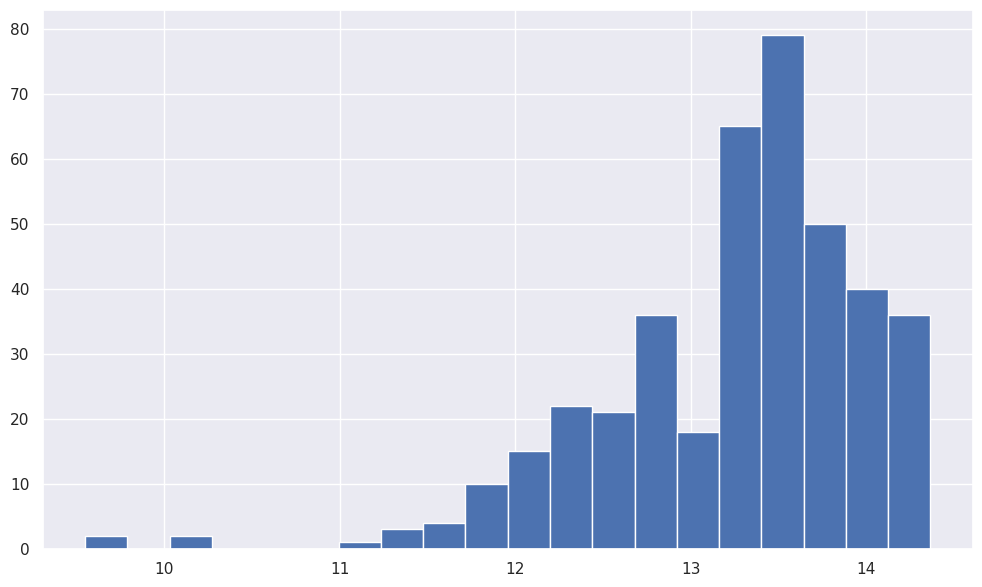

In [57]:
df_matrices_long.go_median_sequence_identity.hist(bins=20)

### Correlation

In [58]:
df_matrices_long_pearson = df_matrices_long.drop(["go_id1", "go_id2"], axis=1).corr(
    method="pearson"
)
df_matrices_long_pearson.columns = df_matrices_long_pearson.columns.to_series().apply(
    lambda s: s.replace("mean", "f1").replace("score", "") + "pearson"
)

df_matrices_long_kendall = df_matrices_long.drop(["go_id1", "go_id2"], axis=1).corr(
    method="kendall"
)
df_matrices_long_kendall.columns = df_matrices_long_kendall.columns.to_series().apply(
    lambda s: s.replace("mean", "f1").replace("score", "") + "kendall"
)

print(
    pd.concat(
        [df_matrices_long_pearson.iloc[:, :2], df_matrices_long_kendall.iloc[:, :2]],
        axis=1,
    )
    .round(3)
    .to_markdown()
)

|                                    |   f1_train_pearson |   f1_test_pearson |   f1_train_kendall |   f1_test_kendall |
|:-----------------------------------|-------------------:|------------------:|-------------------:|------------------:|
| mean_train_score                   |              1     |             0.96  |              1     |             0.824 |
| mean_test_score                    |              0.96  |             1     |              0.824 |             1     |
| class1_n_samples                   |             -0.327 |            -0.297 |             -0.255 |            -0.221 |
| class2_n_samples                   |             -0.254 |            -0.229 |             -0.164 |            -0.137 |
| overlap                            |             -0.11  |            -0.082 |             -0.35  |            -0.308 |
| semantic_similarity_Resnik         |              0.258 |             0.267 |              0.244 |             0.243 |
| semantic_similarity_Lin       

### Scatter plots

In [59]:
import seaborn as sns

df_matrices_long_hue = pd.concat(
    [
        df_matrices_long.rename(columns={"mean_train_score": "mean_f1_score"})
        .drop("mean_test_score", axis=1)
        .assign(dataset="train"),
        df_matrices_long.rename(columns={"mean_test_score": "mean_f1_score"})
        .drop("mean_train_score", axis=1)
        .assign(dataset="test"),
    ]
)

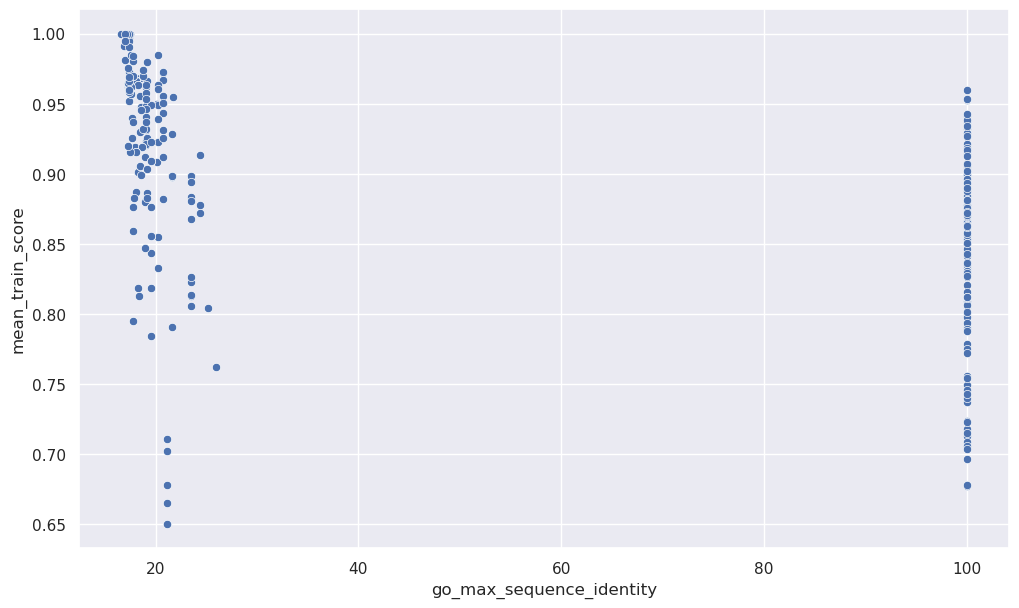

In [60]:
sns.scatterplot(
    data=df_matrices_long,
    x="go_max_sequence_identity",
    y="mean_train_score",
).get_figure().savefig("../reports/03_matrices/max_ident_mean_train_scatter.png")

In [61]:
df_matrices_long_numeric = df_matrices_long[
    df_matrices_long.columns[~df_matrices_long.columns.isin(["go_id1", "go_id2"])]
]

In [62]:
df_matrices_long_numeric[df_matrices_long_numeric.go_max_sequence_identity < 99].corr(
    method="kendall"
).round(3)

,mean_train_score,mean_test_score,class1_n_samples,class2_n_samples,overlap,semantic_similarity_Resnik,semantic_similarity_Lin,semantic_similarity_Rel,semantic_similarity_Jiang,semantic_similarity_TCSS,...,tanimoto_atompairs_go_min,tanimoto_atompairs_go_max,tanimoto_torsions_go_mean,tanimoto_torsions_go_median,tanimoto_torsions_go_min,tanimoto_torsions_go_max,tanimoto_maccs_go_mean,tanimoto_maccs_go_median,tanimoto_maccs_go_min,tanimoto_maccs_go_max
mean_train_score,1.000,0.791,-0.043,-0.076,NaN,0.285,-0.112,-0.111,-0.132,0.286,...,NaN,NaN,0.707,0.707,0.707,0.707,0.707,0.707,0.707,0.707
mean_test_score,0.791,1.000,-0.003,-0.044,NaN,0.260,-0.086,-0.087,-0.106,0.262,...,NaN,NaN,0.707,0.707,0.707,0.707,0.707,0.707,0.707,0.707
class1_n_samples,-0.043,-0.003,1.000,-0.255,NaN,0.161,0.259,0.258,0.266,0.152,...,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
class2_n_samples,-0.076,-0.044,-0.255,1.000,NaN,0.121,0.297,0.296,0.309,0.122,...,NaN,NaN,0.775,0.775,0.775,0.775,0.775,0.775,0.775,0.775
overlap,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
semantic_similarity_Resnik,0.285,0.260,0.161,0.121,NaN,1.000,0.555,0.555,0.516,0.980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
semantic_similarity_Lin,-0.112,-0.086,0.259,0.297,NaN,0.555,1.000,0.998,0.977,0.547,...,NaN,NaN,0.236,0.236,0.236,0.236,0.236,0.236,0.236,0.236
semantic_similarity_Rel,-0.111,-0.087,0.258,0.296,NaN,0.555,0.998,1.000,0.977,0.548,...,NaN,NaN,0.236,0.236,0.236,0.236,0.236,0.236,0.236,0.236
semantic_similarity_Jiang,-0.132,-0.106,0.266,0.309,NaN,0.516,0.977,0.977,1.000,0.508,...,NaN,NaN,0.236,0.236,0.236,0.236,0.236,0.236,0.236,0.236
semantic_similarity_TCSS,0.286,0.262,0.152,0.122,NaN,0.980,0.547,0.548,0.508,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


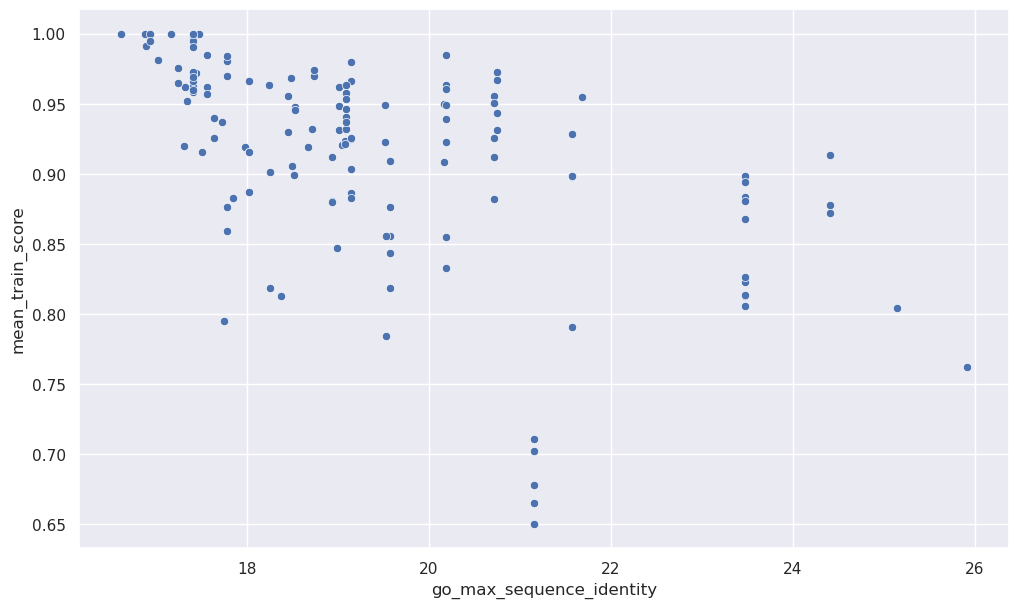

In [63]:
sns.scatterplot(
    df_matrices_long[df_matrices_long.go_max_sequence_identity < 99],
    y="mean_train_score",
    x="go_max_sequence_identity",
).get_figure().savefig("../reports/03_matrices/max_ident_mean_train_scatter_no100.png")

In [64]:
go_to_name = {k: v for k, v in load_df("go_obo").nodes(data="name")}

What are the lowest-performing pairs in this plot?

In [65]:
tmp = df_matrices_long[
    (df_matrices_long.go_max_sequence_identity < 99)
    & (df_matrices_long.mean_train_score < 0.7)
]

print(
    pd.concat(
        [tmp.go_id1.map(go_to_name), tmp.go_id2.map(go_to_name), tmp.mean_train_score],
        axis=1,
    )
    .round(3)
    .sort_values("mean_train_score")
    .to_markdown(index=False)
)

| go_id1                                                        | go_id2                                                        |   mean_train_score |
|:--------------------------------------------------------------|:--------------------------------------------------------------|-------------------:|
| protein transmembrane transporter activity                    | inorganic molecular entity transmembrane transporter activity |              0.65  |
| inorganic molecular entity transmembrane transporter activity | macromolecule transmembrane transporter activity              |              0.65  |
| monoatomic ion transmembrane transporter activity             | macromolecule transmembrane transporter activity              |              0.665 |
| protein transmembrane transporter activity                    | monoatomic ion transmembrane transporter activity             |              0.665 |
| protein transmembrane transporter activity                    | inorganic cation transmembra

In [66]:
tmp = pd.concat(
    [df_matrices_long.go_id1.map(go_to_name), df_matrices_long.go_id2.map(go_to_name)],
    axis=1,
)
print(
    tmp[
        (tmp.go_id1 == "protein transmembrane transporter activity")
        | (tmp.go_id2 == "protein transmembrane transporter activity")
    ].shape[0]
)
print(
    tmp[
        (tmp.go_id1 == "macromolecule transmembrane transporter activity")
        | (tmp.go_id2 == "macromolecule transmembrane transporter activity")
    ].shape[0]
)

31
31


#### Min identity

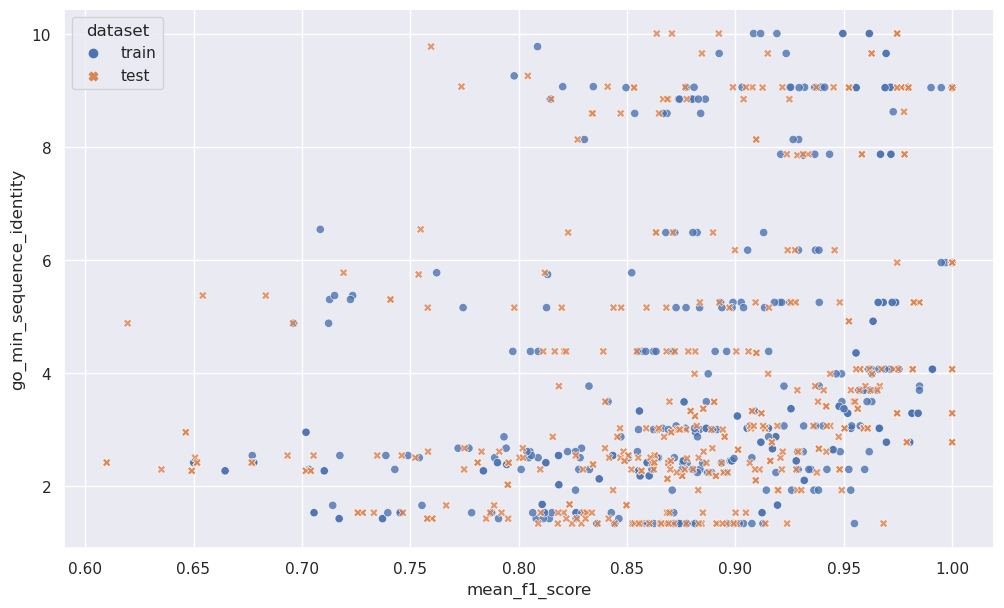

In [67]:
import seaborn as sns

sns.scatterplot(
    data=df_matrices_long_hue,
    x="mean_f1_score",
    y="go_min_sequence_identity",
    hue="dataset",
    style="dataset",
    alpha=0.8,
).get_figure().savefig("../reports/03_matrices/min_ident_mean_train_scatter.png")

### Median identity

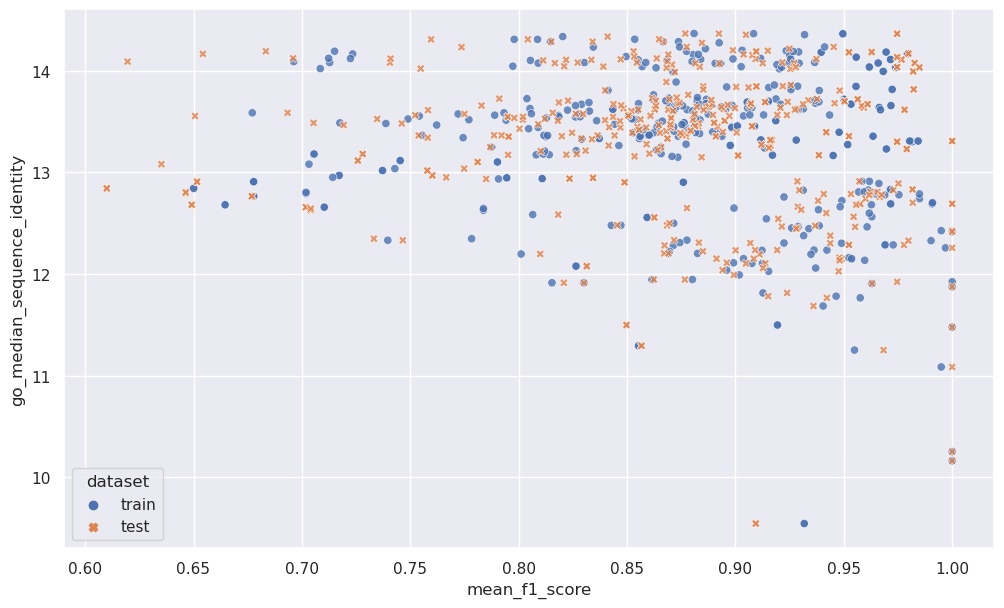

In [68]:
import seaborn as sns

sns.scatterplot(
    data=df_matrices_long_hue,
    x="mean_f1_score",
    y="go_median_sequence_identity",
    hue="dataset",
    style="dataset",
    alpha=0.8,
).get_figure().savefig("../reports/03_matrices/median_ident_mean_train_scatter.png")

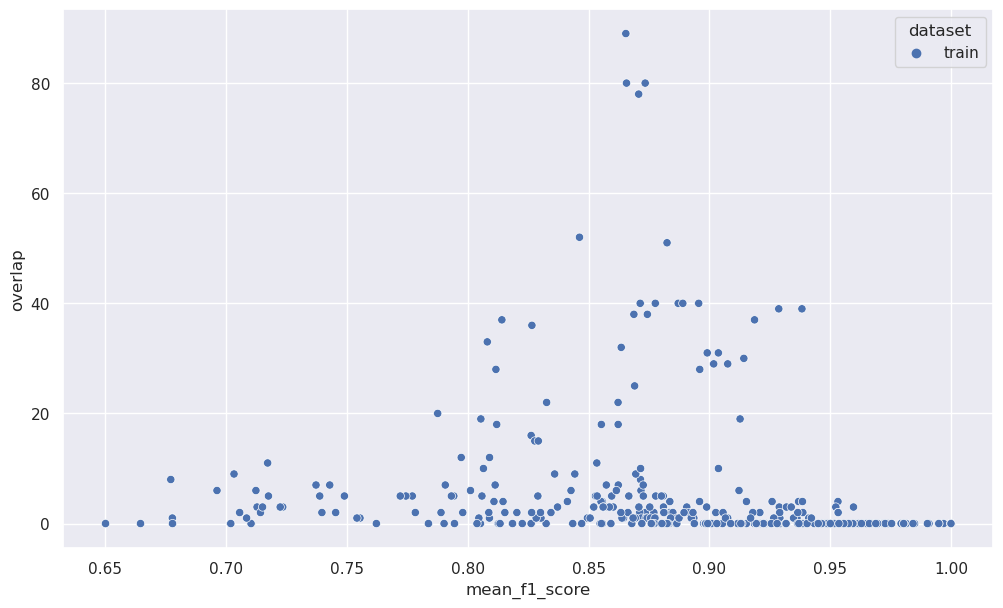

In [69]:
import seaborn as sns

sns.scatterplot(
    data=df_matrices_long_hue[df_matrices_long_hue.dataset == "train"],
    x="mean_f1_score",
    y="overlap",
    hue="dataset",
    style="dataset",
).get_figure().savefig("../reports/03_matrices/overlap_ident_mean_train_scatter.png")

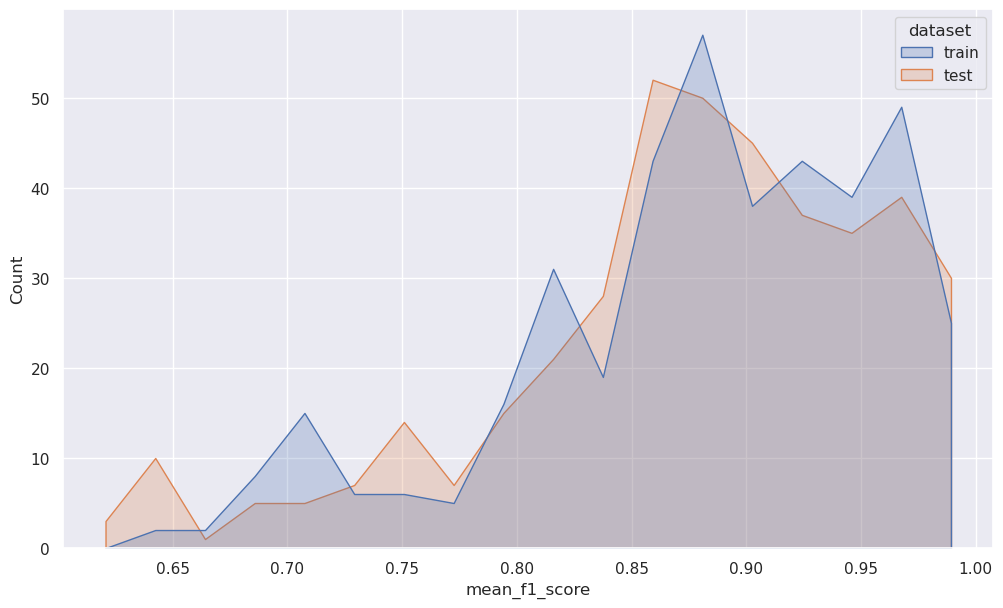

In [70]:
sns.histplot(
    df_matrices_long_hue, x="mean_f1_score", hue="dataset", element="poly"
).get_figure().savefig("../reports/03_matrices/ml_scores_dist.png")

### Top 10, low 10

In [71]:
df_matrices_long_low10 = df_matrices_long.sort_values("mean_train_score").iloc[
    :10,
    :10,
]

In [72]:
print(
    df_matrices_long_low10.assign(go_id1=df_matrices_long_low10.go_id1.map(go_to_name))
    .assign(go_id2=df_matrices_long_low10.go_id2.map(go_to_name))
    .round(3)
    .to_markdown(index=False)
)

| go_id1                                                        | go_id2                                                        |   mean_train_score |   mean_test_score |   class1_n_samples |   class2_n_samples |   overlap |   semantic_similarity_Resnik |   semantic_similarity_Lin |   semantic_similarity_Rel |
|:--------------------------------------------------------------|:--------------------------------------------------------------|-------------------:|------------------:|-------------------:|-------------------:|----------:|-----------------------------:|--------------------------:|--------------------------:|
| protein transmembrane transporter activity                    | inorganic molecular entity transmembrane transporter activity |              0.65  |             0.61  |                 21 |                158 |         0 |                        0.299 |                     0.585 |                     0.557 |
| inorganic molecular entity transmembrane transporter activity 

In [73]:
df_matrices_long_top10 = df_matrices_long.sort_values(
    "mean_train_score", ascending=False
).iloc[
    :10,
    :10,
]

In [74]:
print(
    df_matrices_long_top10.assign(go_id1=df_matrices_long_top10.go_id1.map(go_to_name))
    .assign(go_id2=df_matrices_long_top10.go_id2.map(go_to_name))
    .round(3)
    .to_markdown(index=False)
)

| go_id1                                                            | go_id2                                                              |   mean_train_score |   mean_test_score |   class1_n_samples |   class2_n_samples |   overlap |   semantic_similarity_Resnik |   semantic_similarity_Lin |   semantic_similarity_Rel |
|:------------------------------------------------------------------|:--------------------------------------------------------------------|-------------------:|------------------:|-------------------:|-------------------:|----------:|-----------------------------:|--------------------------:|--------------------------:|
| solute:monoatomic cation symporter activity                       | ABC-type transporter activity                                       |              1     |             1     |                 34 |                 22 |         0 |                        0.424 |                     0.652 |                     0.644 |
| antiporter activity             

## Plots for presentation

In [75]:
import networkx as nx
import matplotlib.pyplot as plt


def graph_plot(
    df_uniprot_goa: pd.DataFrame, min_samples_per_term: int = 0, method: str = "labels"
):
    network_go = load_df("go_obo")
    go_to_name = {k: v for k, v in network_go.nodes(data="name")}
    labels_count_dict = (
        df_uniprot_goa[["go_id_ancestor", "Uniprot"]]
        .drop_duplicates()
        .groupby("go_id_ancestor")
        .apply(len)
        .to_dict()
    )
    labels_count_dict = {
        k: v for k, v in labels_count_dict.items() if v >= min_samples_per_term
    }
    network_go = network_go.subgraph(nodes=labels_count_dict.keys())

    network_go = network_go.edge_subgraph(
        [(a, b, k) for a, b, k in network_go.edges(keys=True) if k == "is_a"]
    )
    name_to_go = {v: k for k, v in go_to_name.items()}
    plt.figure(3, figsize=(20, 20))

    layout = nx.nx_agraph.graphviz_layout(
        network_go,
        prog="dot",
        root=name_to_go["transmembrane transporter activity"],
    )
    if method == "numbers":
        nx.draw(
            network_go, layout, edgecolors="black", node_color="white", node_size=300
        )  #  node_color="grey"
        nx.draw_networkx_labels(
            network_go, pos=layout, font_size=8, labels=labels_count_dict
        )
    elif method == "labels":
        nx.draw(
            network_go, layout, node_color="white", node_size=1000
        )  #  node_color="grey"

        labels_name_dict = dict(network_go.nodes(data="name"))

        text = nx.draw_networkx_labels(
            network_go,
            pos=layout,
            font_size=15,
            labels=labels_name_dict,
            verticalalignment="bottom",
        )
        for _, t in text.items():
            t.set_rotation(10)
            t.set_rotation_mode("anchor")
        text = nx.draw_networkx_labels(
            network_go,
            pos=layout,
            font_size=15,
            labels=labels_count_dict,
            verticalalignment="top",
        )
        for _, t in text.items():
            t.set_rotation(10)
            t.set_rotation_mode("anchor")

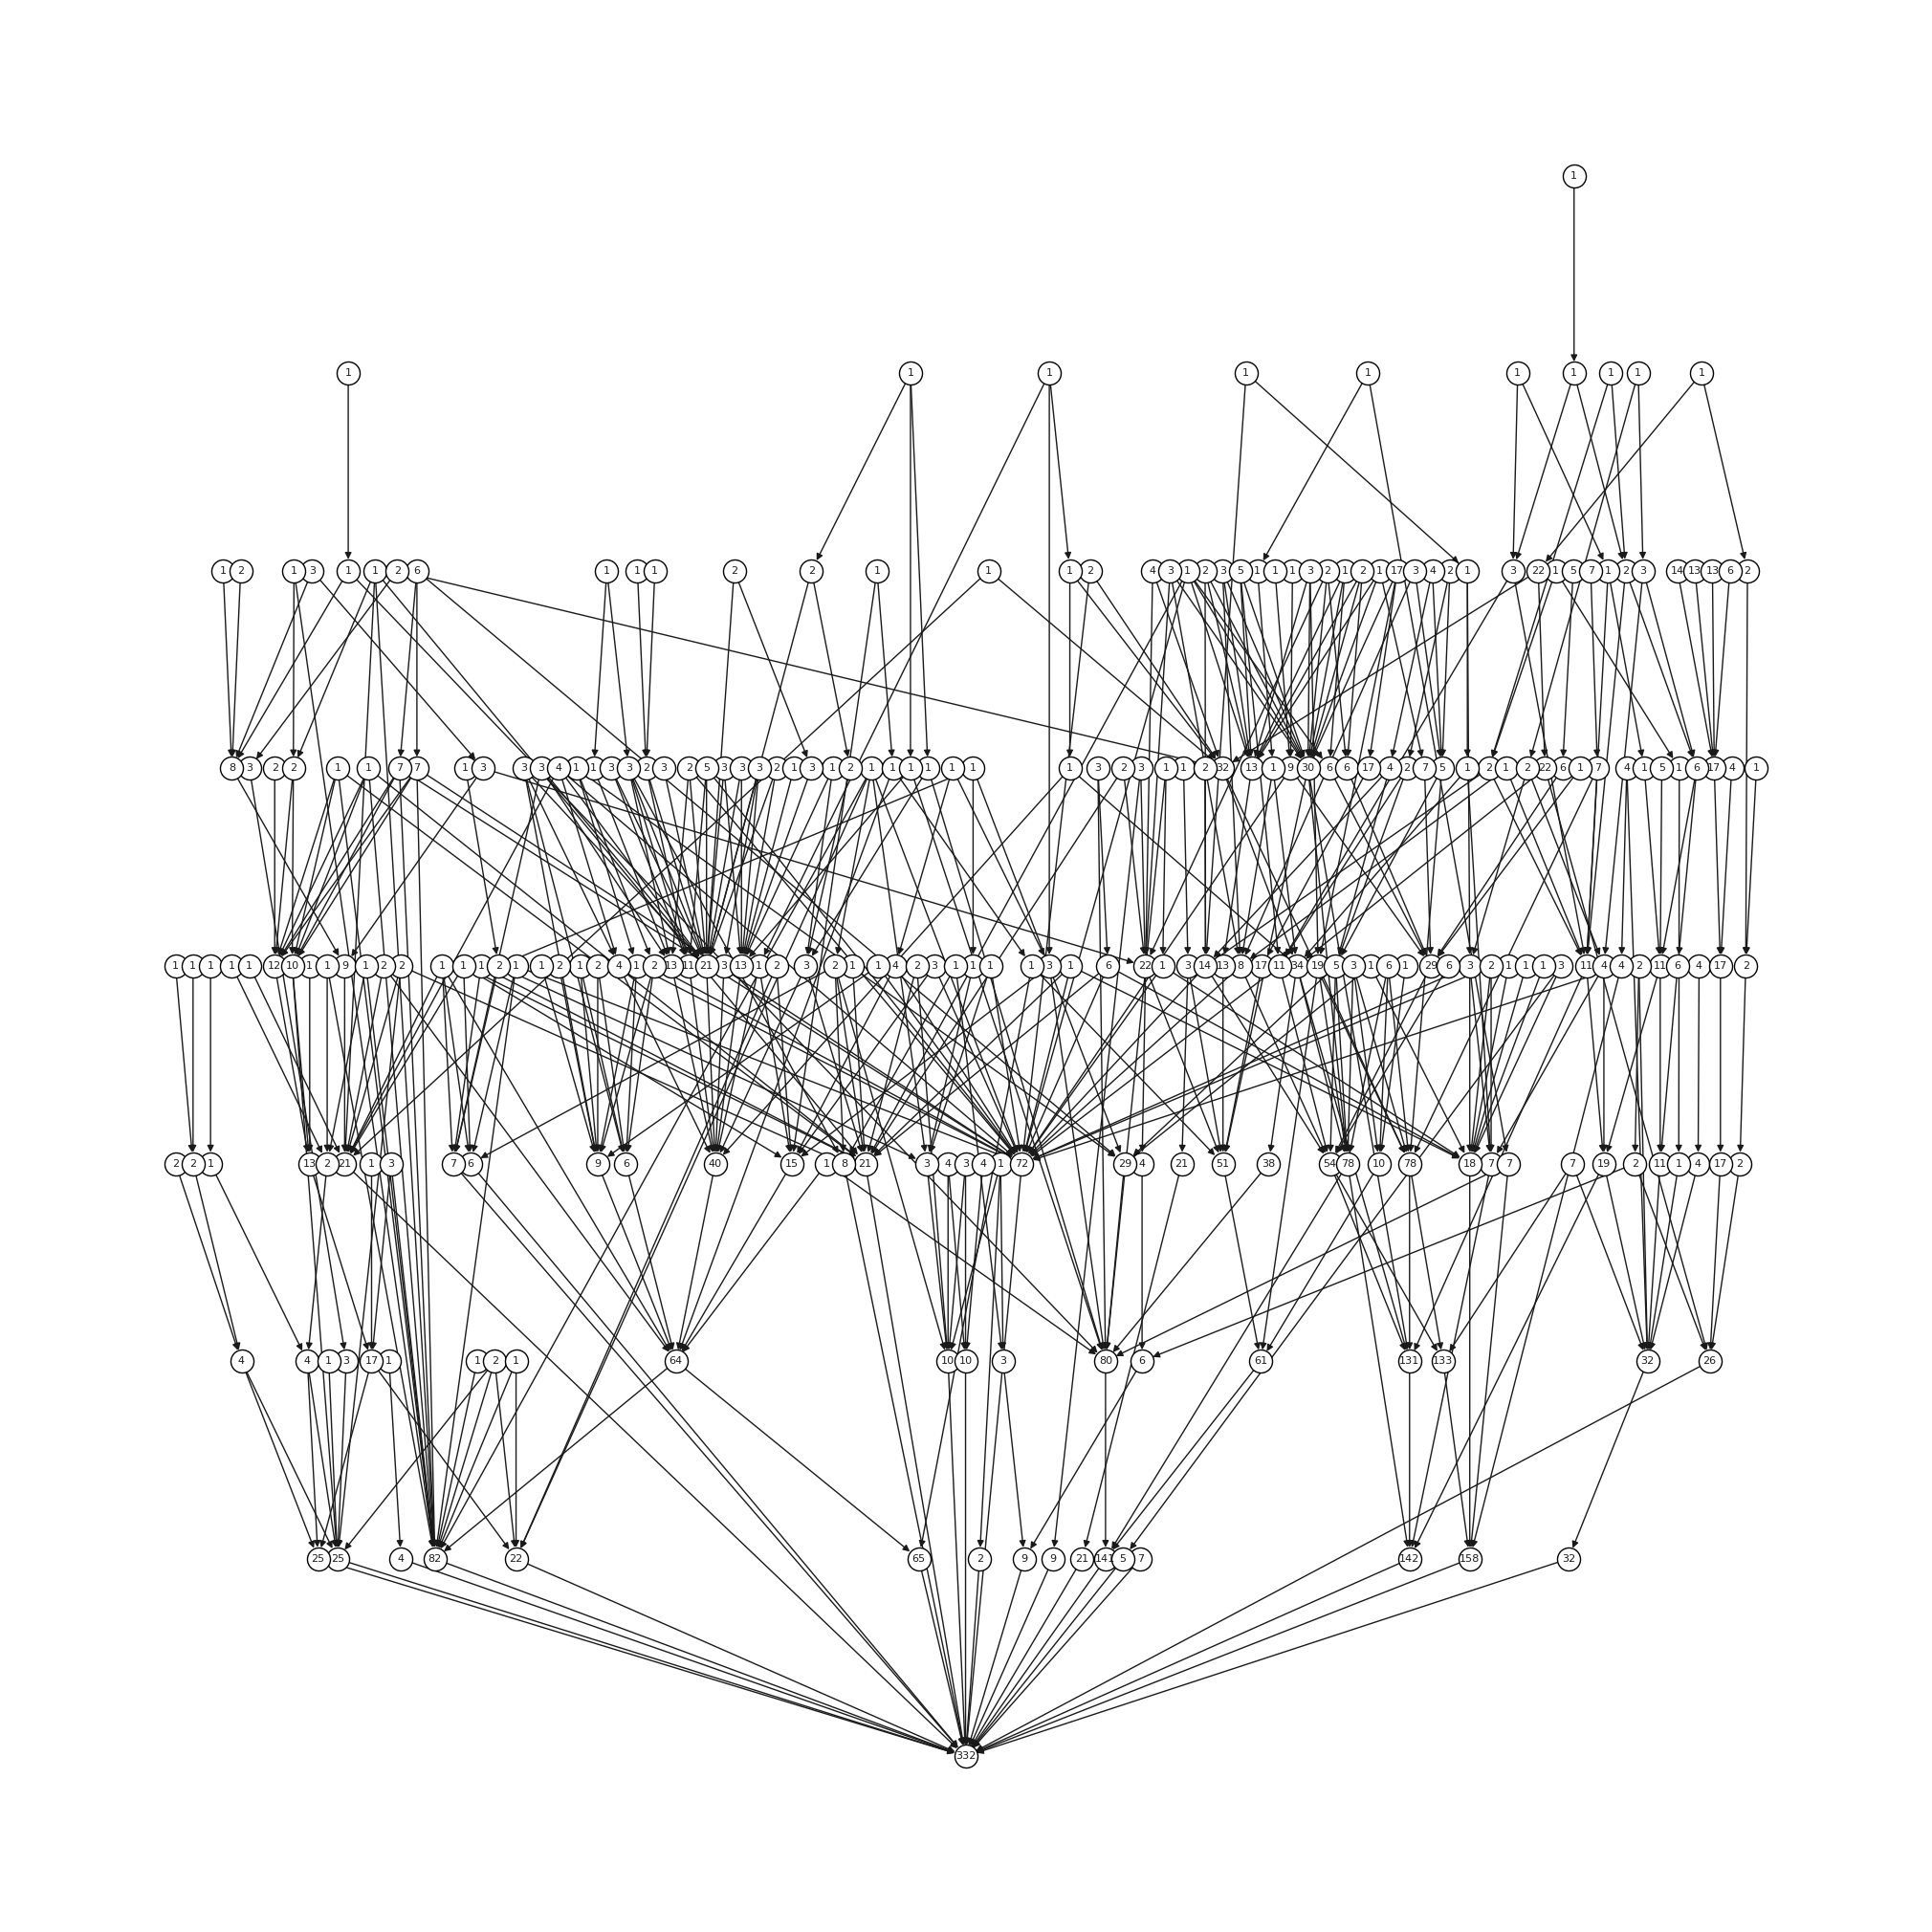

In [76]:
graph_plot(df_uniprot_goa=df_uniprot_goa, min_samples_per_term=0, method="numbers")

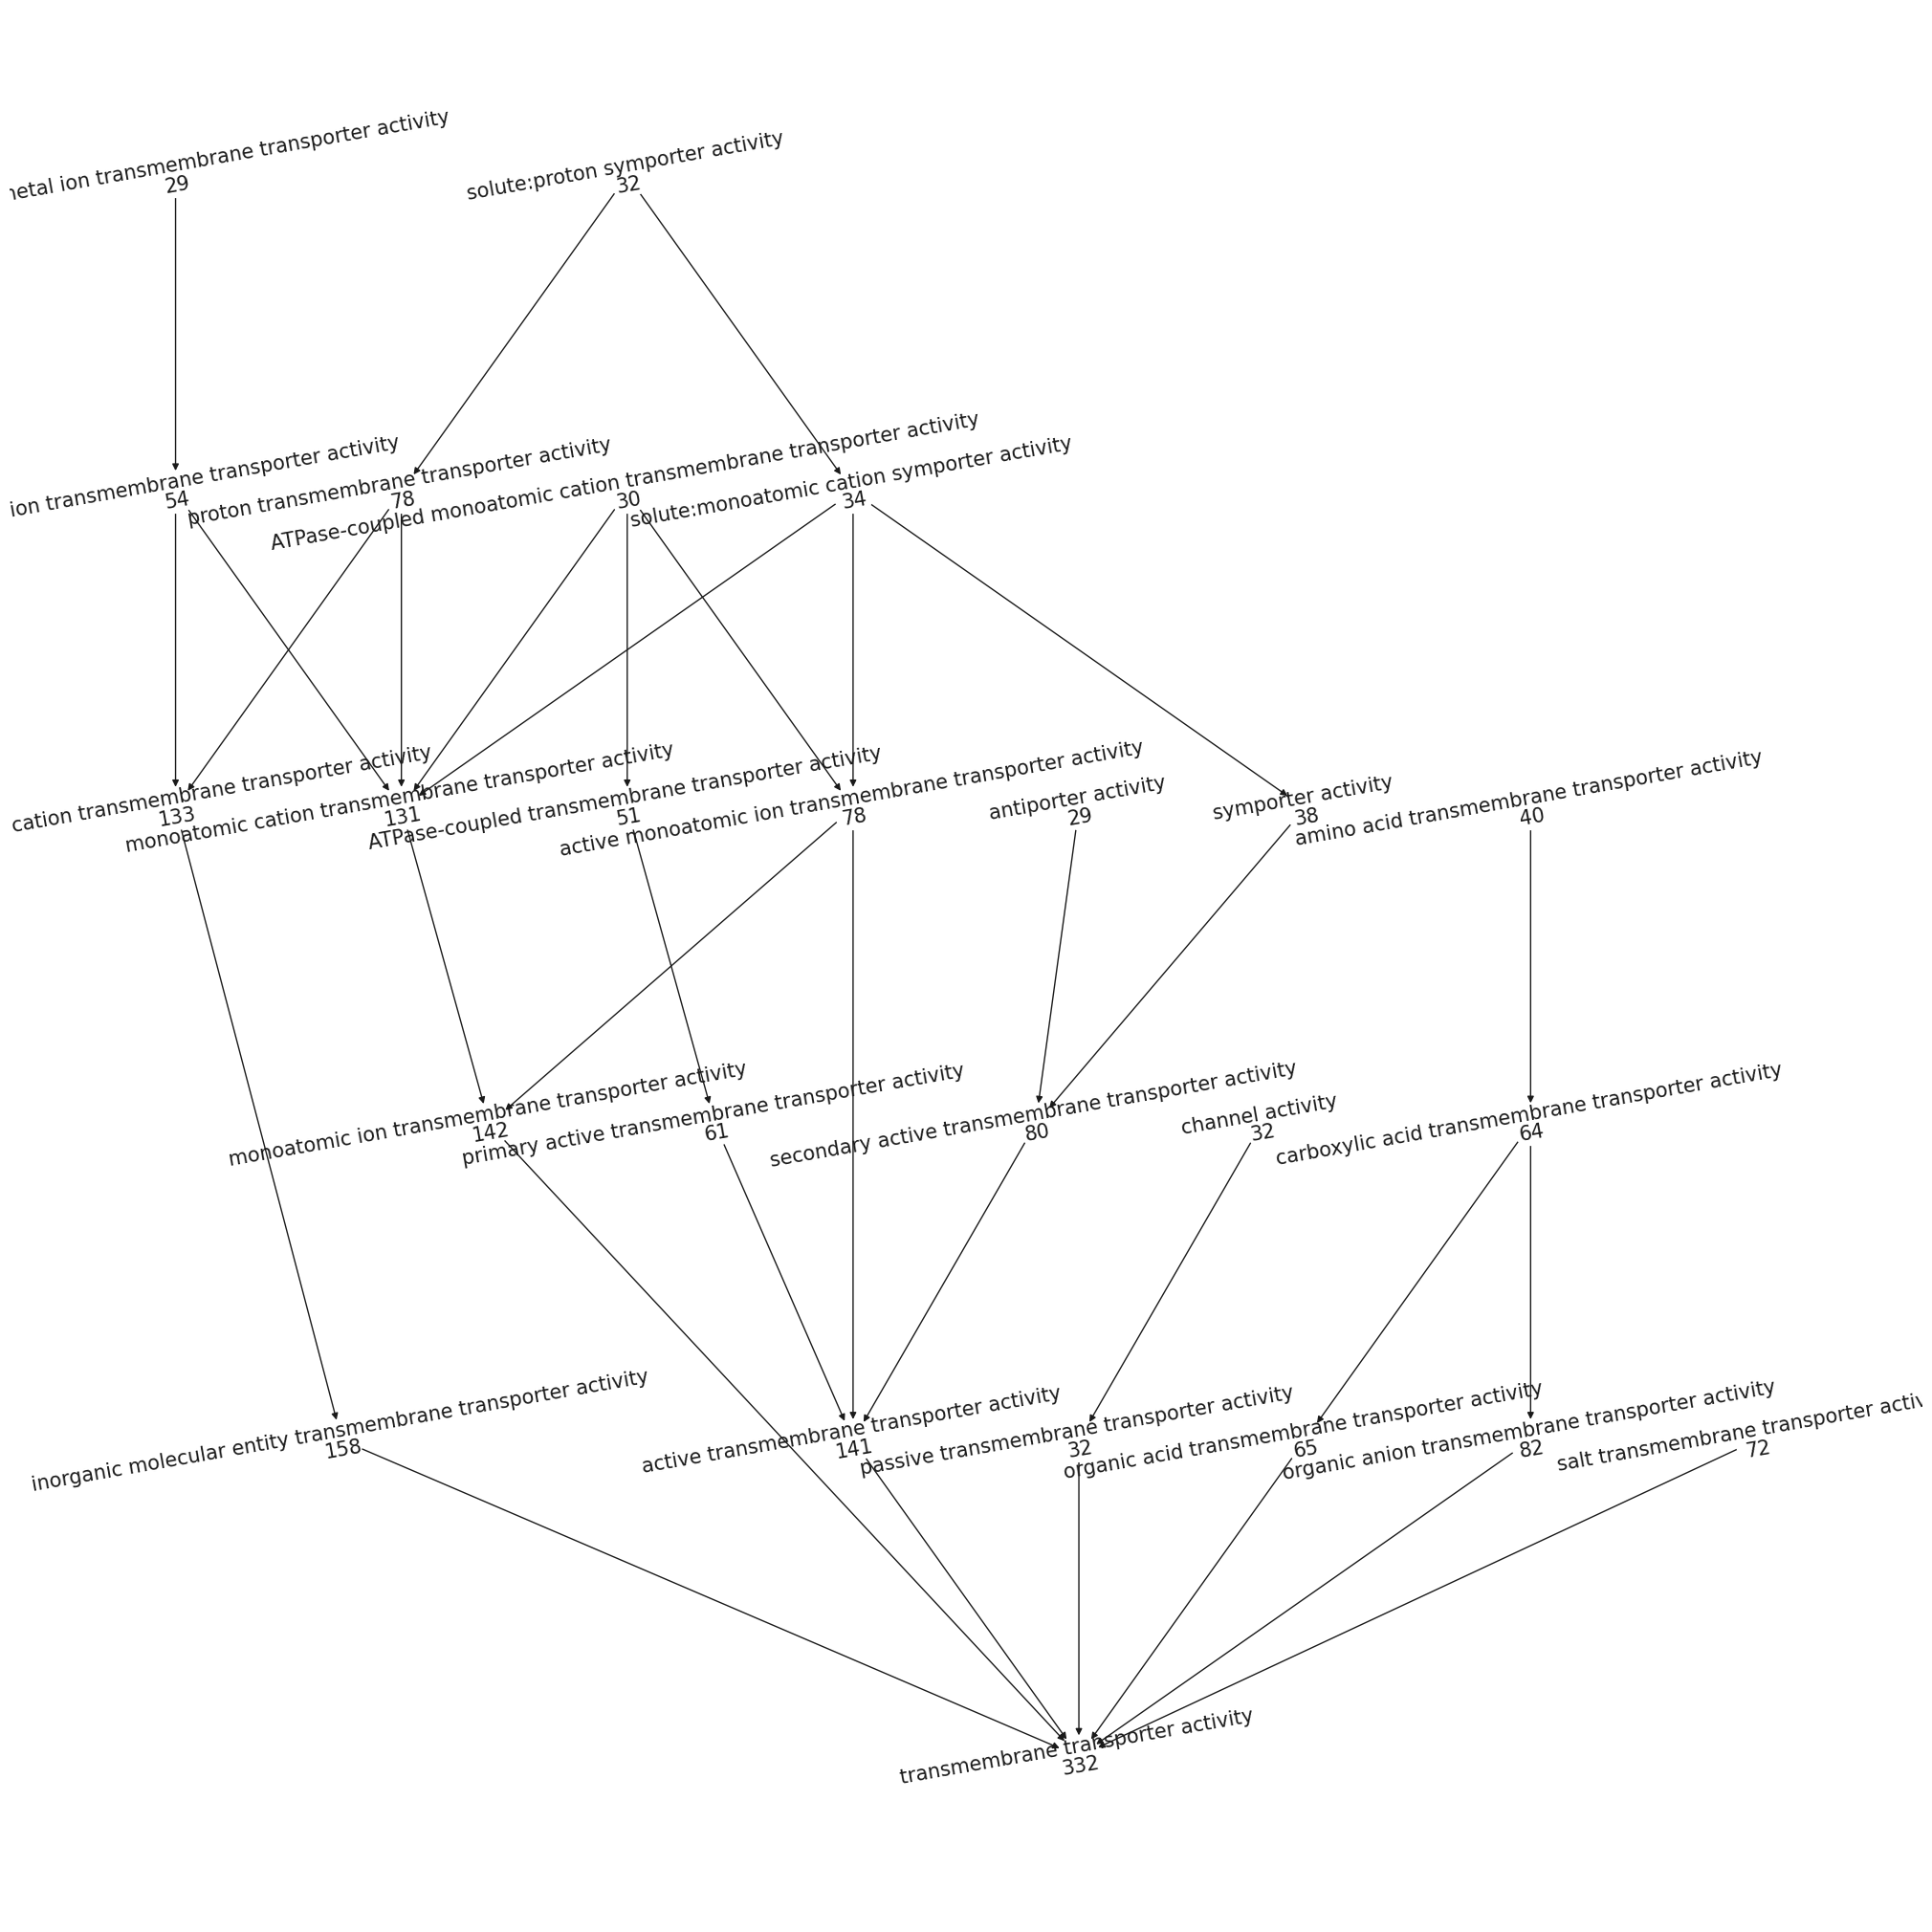

In [77]:
graph_plot(df_uniprot_goa=df_uniprot_goa, min_samples_per_term=29, method="labels")

Text(0.5, 1.0, 'Protein annotations of transporter GO terms\nmean 11.455, std 29.208')

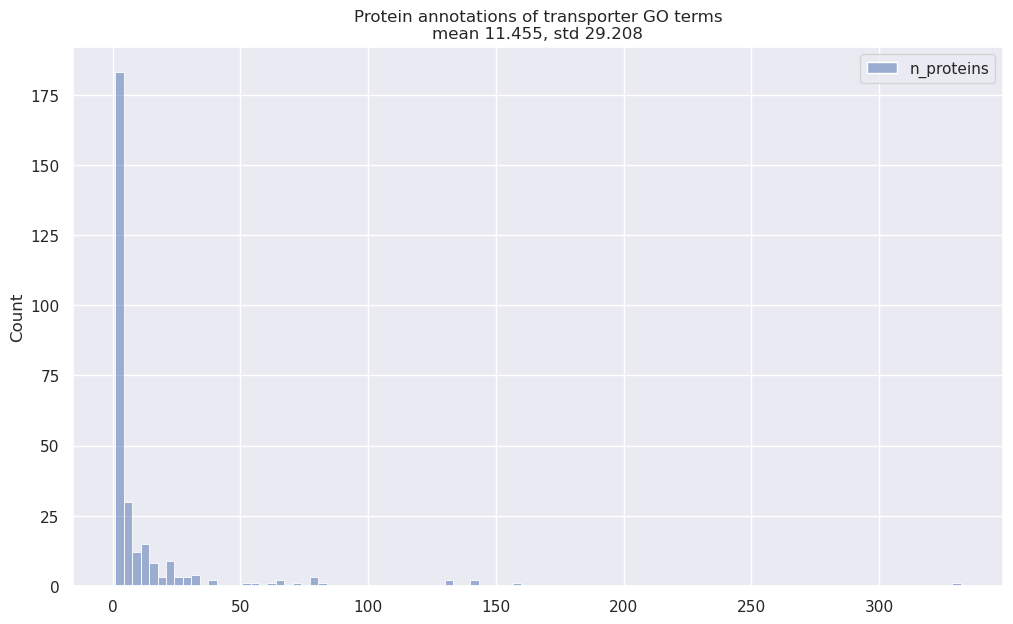

In [78]:
import seaborn as sns

df_counts = (
    df_uniprot_goa[["go_id_ancestor", "Uniprot"]]
    .drop_duplicates()
    .groupby("go_id_ancestor")
    .apply(len)
    .rename("n_proteins")
    .to_frame()
)
ax = sns.histplot(df_counts, bins=100)

ax.set_title("Protein annotations of transporter GO terms\nmean 11.455, std 29.208")